# Sesión 5 - Inteligencia Artificial
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, problemas conocidos que vamos a resolver utilizando algoritmos de búsqueda local. 
En la segunda parte de la práctica se pide resolver el problema dado en el enunciado.

## Parte 1. Algoritmo de escalada
Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>
Usaremos la implementación de AIMA que está en el módulo search.py

    def hill_climbing(problem):
        """From the initial node, keep choosing the neighbor with highest value,
        stopping when no neighbor is better. [Figure 4.2]"""
        current = Node(problem.initial)
        while True:
            neighbors = current.expand(problem)
            if not neighbors:
                break
            neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
            if problem.value(neighbor.state) <= problem.value(current.state):
                break
            current = neighbor
        return current.state


### TSP (Travelling Salesman Problem): el problema del viajante
Dado un conjunto de ciudades y la distancia entre cada par de ciudades, el problema es encontrar la ruta más corta posible que visite cada ciudad exactamente una vez y regrese al punto de partida. Es un problema NP hard. No existe (que se sepa) una solución de coste polinomial. 

In [ ]:
cd aima-python

In [2]:
##Resolvereremos el problema del viajante TSP para encontrar una solución aproximada.
from search import *

class TSP_problem(Problem):

    def two_opt(self, state):
        """ Neighbour generating function for Traveling Salesman Problem """
        ## Puedes buscar información adicional del método 2-opt. 
        ## Un vecino 2-opt consiste en eliminar dos aristas y volver a conectar los dos caminos 
        ## resultantes de forma diferente para obtener un nuevo recorrido. 
                
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_state[left: right + 1] = reversed(neighbour_state[left: right + 1])
        return neighbour_state

    def actions(self, state):
        """ action that can be excuted in given state """
        return [self.two_opt]

    def result(self, state, action):
        """  result after applying the given action on the given state """
        return action(state)

    def path_cost(self, c, state1, action, state2):
        """ total distance for the Traveling Salesman to be covered if in state2  """
        cost = 0
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        cost += distances[state2[0]][state2[-1]]
        return cost

    def value(self, state):
        """ value of path cost given negative for the given state """
        return -1 * self.path_cost(None, None, None, state)

In [9]:
## Resolveremos el TSP para las ciudades de la lista de ciudades de Rumanía.
## ['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']

Esta es la imagen del mapa de Rumanía. 

![image.png](attachment:image.png)

In [3]:
# Usaremos la siguiente representacion del libro AIMA para el mapa de Rumanía.

romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Es bastante sencillo entender este `romania_map`. El primer nodo ** Arad ** tiene tres vecinos llamados ** Zerind **, ** Sibiu **, ** Timisoara **. Cada uno de estos nodos están a distancias 75, 140, 118 de ** Arad ** respectivamente. Y lo mismo ocurre con otros nodos.

Y `romania_map.locations` contiene las posiciones de cada uno de los nodos. 
Como heurística se puede usar la distancia en línea recta o la distancia manhattan (que es diferente de la proporcionada en `romania_map`) entre dos ciudades.

In [4]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


In [5]:
# node colors, node positions and node label positions
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

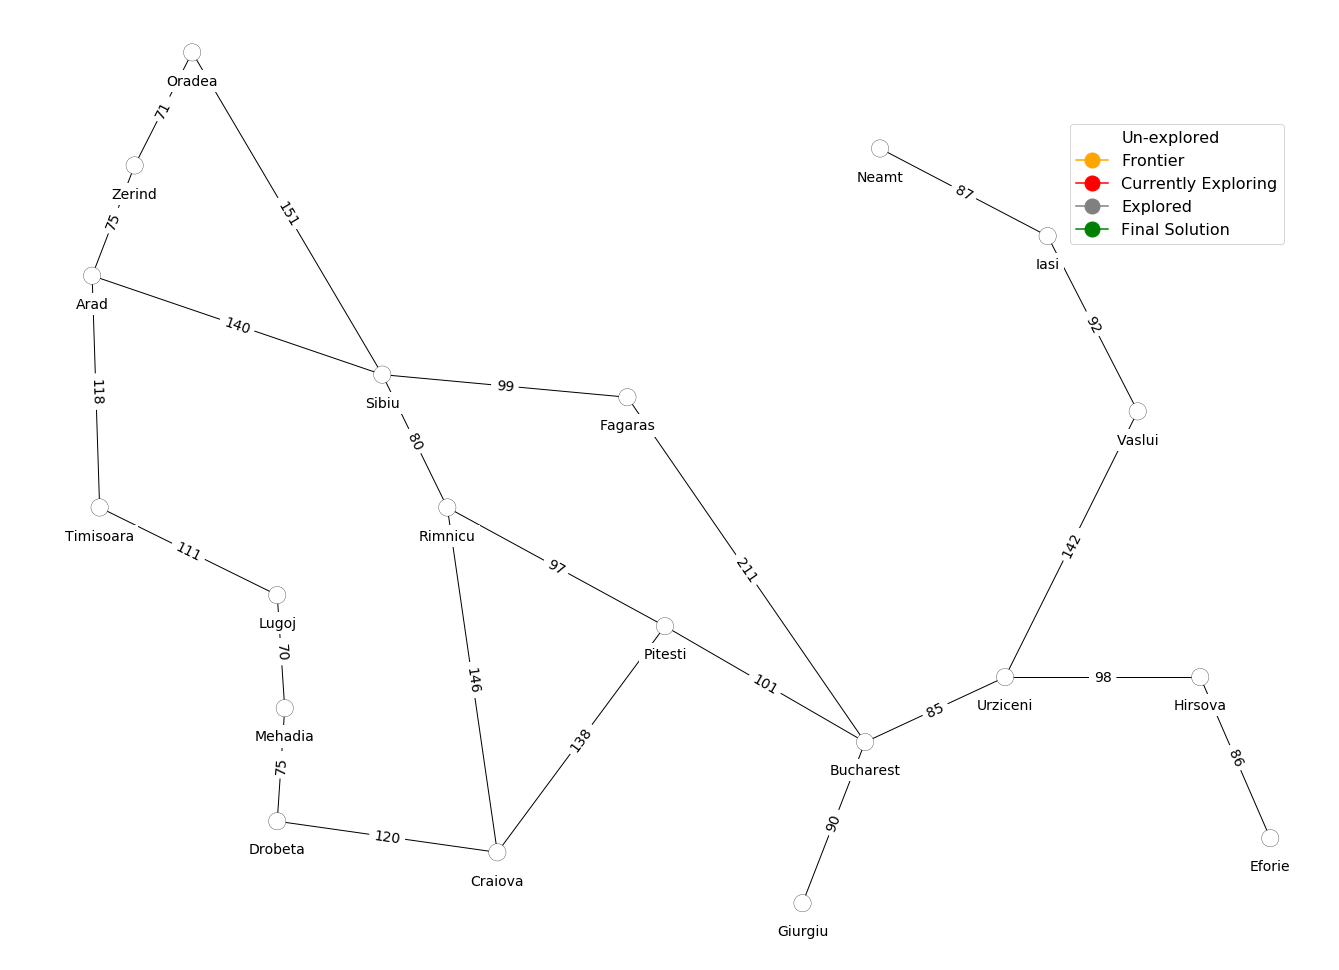

In [6]:
## el siguiente código crea un diccionario y calcula y añade al diccionario la distancia manhattan entre las ciudades. 
import numpy as np

distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

for name_1, coordinates_1 in romania_map.locations.items():
        for name_2, coordinates_2 in romania_map.locations.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']


In [7]:
# Creamos una instancia del problema TSP con la lista de ciudades anterior que se ha extraido del mapa.
# En el mapa hay informacion de las distancias que se utilizan en la clase TSP_problem para calcular el coste y las heurísticas.
tsp = TSP_problem(all_cities)

In [8]:
## Redefinimos el hill climbing de AIMA para que el método de generacion de vecinos sea acceder al grafo que hemos definido para el TSP
##  Escalada por máxima pendiente con 100 vecinos generados con el procedimiento 2-opt


def hill_climbing(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=100):
        """ finds neighbors using two_opt method """
        
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state
            
        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 10000
    
    current = Node(problem.initial)
    while iterations:
        neighbors = find_neighbors(current.state)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            current.state = neighbor.state
        iterations -= 1
        
    return current.state

In [16]:
# Y lo resolvemos con escalada por máxima pendiente. 
hill_climbing(tsp)

['Eforie',
 'Sibiu',
 'Vaslui',
 'Urziceni',
 'Zerind',
 'Drobeta',
 'Neamt',
 'Arad',
 'Rimnicu',
 'Giurgiu',
 'Timisoara',
 'Craiova',
 'Bucharest',
 'Fagaras',
 'Pitesti',
 'Oradea',
 'Mehadia',
 'Lugoj',
 'Hirsova',
 'Iasi']

### Ejercicio 1. Resuelve el problema TSP con el algoritmo de escalada por máxima pendiente en el mapa de ciudades de Rumanía y explica el resultado obtenido. 

Realiza varias ejecuciones y comenta razonadamente las propiedades del algoritmo: eficiencia y optimalidad en base a la ejecución.  ¿Ha encontrado el algoritmo el óptimo global? ¿Ha encontrado la misma solución en distintas ejecuciones?
Sólo se pide hacer una comparativa teórica (breve) con cómo se comporta este algoritmo.
Relacionarlo con otros algoritmos vistos en clase.

In [19]:
tsp = TSP_problem(all_cities)
hill_climbing(tsp)

['Pitesti',
 'Oradea',
 'Vaslui',
 'Neamt',
 'Giurgiu',
 'Fagaras',
 'Eforie',
 'Rimnicu',
 'Iasi',
 'Zerind',
 'Sibiu',
 'Drobeta',
 'Lugoj',
 'Timisoara',
 'Mehadia',
 'Urziceni',
 'Arad',
 'Craiova',
 'Hirsova',
 'Bucharest']

In [24]:
hill_climbing(tsp)

['Zerind',
 'Neamt',
 'Drobeta',
 'Bucharest',
 'Eforie',
 'Sibiu',
 'Hirsova',
 'Oradea',
 'Rimnicu',
 'Mehadia',
 'Giurgiu',
 'Vaslui',
 'Iasi',
 'Lugoj',
 'Pitesti',
 'Fagaras',
 'Arad',
 'Craiova',
 'Urziceni',
 'Timisoara']

In [25]:
hill_climbing(tsp)

['Oradea',
 'Iasi',
 'Urziceni',
 'Zerind',
 'Neamt',
 'Fagaras',
 'Pitesti',
 'Drobeta',
 'Timisoara',
 'Hirsova',
 'Eforie',
 'Lugoj',
 'Sibiu',
 'Mehadia',
 'Craiova',
 'Rimnicu',
 'Bucharest',
 'Vaslui',
 'Arad',
 'Giurgiu']

Comentarios:

Tras realizar más de 20 ejecuciones hemos observado que las soluciones que obtenemos son muy diferentes unas de otras y no son óptimas, como se puede comprobar tan solo dibujándolas en el mapa de Rumanía. Esto ya lo sabiamos de clase, puesto que ya vimos que el algoritmo de escalada por máxima pendiente no es óptimo (ni completo). Un ejemplo claro de esto es el problema de la mochila por escalada de máxima pendiente, que puede atascarse o terminar en un estado que no es óptimo, como ya comentamos en clase. De la misma forma, en nuestro problema del TSP sucede algo totalmente similar, y no alcanza la solución óptima quedándose atascado en distintos puntos extremos locales. Por último, comentar que esto contrasta con otros algoritmos que ya hemos visto como el astar_search, que bajo heurísticas consistentes es óptimo, o la búsqueda en anchura (aunque los enfoques de estos algoritmos y el Hill Climbing son distintos). Sin embargo, otros algoritmos de búsqueda local que también hemos visto tienen el mismo problema de posibles estancamientos, como por ejemplo el enfriamiento simulado.

## Parte 2. Enfriamiento simulado ( simulated annealing) 
El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar a la escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado,
pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    
    def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it
    returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) 
Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro). 

    def exp_schedule(k=20, lam=0.005, limit=100):
        """One possible schedule function for simulated annealing"""
        return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

Como ejemplo, vamos a definir un problema sencillo de encontrar el valor más alto en una rejilla. Este problema está definido en el módulo search.py como PeakFindingProblem. Lo reproducimos aquí y creamos una rejilla simple.

In [81]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

In [82]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] <= self.n - 1 and next_state[1] <= self.m - 1:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [83]:
problem = PeakFindingProblem(initial, grid, directions4)

In [89]:
# Lo resolvemos con enfriamiento simulado

solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(solutions)

9

In [30]:
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

In [133]:
solution = problem.value(hill_climbing(problem))
solution

7

### Ejercicio 2.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta y razona los resultados obtenidos en distintas rejjillas con los algoritmos de enfriamiento simulado y escalada por máxima pendiente. 
 
 
Ejemplo de rejilla para pruebas

grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]


In [26]:
initial = (0, 0)
grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]


In [27]:
problem = PeakFindingProblem(initial, grid, directions4)

In [29]:
veces_optimo=0
for j in range(100):
    solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
    if max(solutions)==11.2:
        veces_optimo+=1
        
print(f"{veces_optimo}%")

92%


Al conocer cual es el máximo global (11.2), podemos calcular el porcentaje de veces que el algoritmo por enfriamiento simulado con directions4 es óptimo en 100 pruebas. Obtenemos que es óptimo en 92 / 100, que es aceptable aunque deja en evidencia que no es óptimo siempre.

In [33]:
solution = problem.value(hill_climbing(problem))
solution

0.0

Como lamentablemente era de esperar, con el algoritmo de escalada por máxima pendiente empezando en (0,0), obtenemos de resultado 0.0 porque no avanza al quedarse atascado al principio por no poder encontrar mejores valores.

In [34]:
problem = PeakFindingProblem(initial, grid, directions8)

In [35]:
veces_optimo=0
for j in range(100):
    solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
    if max(solutions)==11.2:
        veces_optimo+=1
        
print(f"{veces_optimo}%")

93%


Al repetir las 100 ejecuciones con el algoritmo de enfriamiento simulado pero cambiando a directions8, obtenemos un ligero porcentaje de óptimos encontrados mayor (93 / 100 pruebas).

In [186]:
solution = problem.value(hill_climbing(problem))
solution

0.0

Pero con el algoritmo de escalada por máxima pendiente en directions8 seguimos estancados en 0.0, puesto que las direcciones diagonales también tiene valor 0.0 por lo que no estamos haciendo nada diferente a usar directions4.

Ahora, pasamos a cambiar el estado inicial del que partimos, y vamos a probar uno a uno todos los estados iniciales posibles.

In [232]:
import random
grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
veces_optimo=0
for i in range(12):
    for j in range(9):
        initial = (i, j)
        problem = PeakFindingProblem(initial, grid, directions8)
        solution = problem.value(hill_climbing(problem))
        if solution==11.2:
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

15.74074074074074%


Obtenemos un porcentaje de veces óptimo de alrededor del 15%, es decir, 15 / (12*9) ejecuciones han obtenido el valor óptimo usando el algoritmo de escalada por máxima pendiente y directions8. Esto demuestra, además de que no es óptimo, que la escalada por máxima pendiente depende en gran medida de la propia rejilla y el estado inicial que consideremos.

Por último, vamos a probar con distintas rejillas y vamos a analizar los resultados obtenidos.

In [45]:
import random
grid = [[0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.80, 1.90, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 1.90, 1.95, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 3.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 7.00, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
veces_optimo=0
for i in range(12):
    for j in range(9):
        initial = (i, j)
        problem = PeakFindingProblem(initial, grid, directions8)
        solution = problem.value(hill_climbing(problem))
        if solution==11.2:
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

37.03703703703704%


In [46]:
import random
grid = [[0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.80, 1.90, 1.90, 1.80, 1.70, 1.60, 1.50, 0.00],
        [0.00, 1.90, 1.95, 0.40, 0.40, 0.00, 1.65, 0.00, 0.00],
        [0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 2.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 3.00, 0.00, 3.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 7.00, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
veces_optimo=0
for i in range(12):
    for j in range(9):
        initial = (i, j)
        problem = PeakFindingProblem(initial, grid, directions8)
        solution = problem.value(hill_climbing(problem))
        if solution==11.2:
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

50.0%


En las dos ejecuciones anteriores hemos ido añadiendo valores que reemplazan a los ceros de la rejilla original y podemos ver claramente como, al crear una especie de colina artificial que lleva al máximo absoluto, vamos aumentando el número de ejecuciones óptimas hasta el 50% ya que podemos llegar al estado óptimo desde más puntos iniciales usando el algoritmo de escalada de máxima pendiente.

In [92]:
import random
grid = [[0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.80, 1.90, 1.90, 1.80, 1.70, 1.60, 1.50, 0.00],
        [0.00, 1.90, 1.95, 0.40, 0.40, 0.00, 1.65, 0.00, 0.00],
        [0.00, 0.00, 0.00, 2.00, 0.00, 0.00, 2.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 3.00, 0.00, 3.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 7.00, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
veces_optimo=0
for i in range(12):
    for j in range(9):
        initial = (i,j)
        problem = PeakFindingProblem(initial, grid, directions8)
        solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
        if max(solutions)==11.2:
            veces_optimo+=1
print(f"{veces_optimo*100/(9*12)}%")

90.74074074074075%


Como última prueba, ejecutamos 100 intentos usando enfriamiento simulado sobre la última rejilla modificada, y observamos que el porcentaje con respecto a la rejilla inicial varía menos que con escalada de máxima pendiente, ya que como sabemos, enfriamiento simulado maneja mejor óptimos locales (tanto en la rejilla original como en la modificada) y sabe maniobrar considerando acciones que no se acercan a la óptima con una cierta probabilidad.

## Parte 3. Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [1]:
import random

In [2]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}.
Se usa este ejemplo (del que sabemos la solución) para ver todos los elementos y poder observar el comportamiento del algoritmo genético. 

In [5]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
# La siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    x=x[::-1]
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [18]:
binario_a_decimal((1,1,1,0))

14

In [6]:
# En primer luegar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}.

# Tenemos que definir funciones de cruce, mutación y fitness para este problema.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas en la clase anterior, para esta instancia concreta. Por ejemplo:

In [20]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1125

1125

In [11]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1265625

1265625

In [14]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]

In [15]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [17]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Posible salida: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

[[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

### Ejercicio 3

   - Definir una función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

sugerencia: usar random.choice

   - Definir una función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)

cruza_padres(problema_genetico,padres)

   - Definir la función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
muta_individuos(problema_genetico, poblacion, prob)

In [3]:
def poblacion_inicial(problema_genetico, size):
    l=[] # población inicial
    for i in range(size): # añadimos a la población size individuos
        x=[]
        for j in range(problema_genetico.longitud_individuos): # los individuos se generan eligiendo sus genes
                                                               # de manera eleatoria de entre los genes posibles
            x.append(random.choice(problema_genetico.genes))
        l.append(x) 
    return l

In [64]:
poblacion_inicial(cuadrados,10)

[[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
 [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 0, 1, 1, 1, 0, 1]]

In [4]:
def cruza_padres(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):# asumimos que la población de la que partimos tiene tamaño par
        desc = problema_genetico.fun_cruza(padres[2*i],padres[2*i+1]) # El cruce se realiza con la función de cruce  
                                                                     # proporcionada por el propio problema genético
        l.append(desc[0]) # La población resultante se obtiene de cruzar el padre[0] con padre[1], padre[2] con padre[3]...
        l.append(desc[1]) # y añadir cada par de descendientes a la nueva población
    return l

In [74]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

[[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]]

In [5]:
# hay que llamar a  problema_genetico.muta(x,prob) para todos los individuos de la poblacion.
def muta_individuos(problema_genetico, poblacion, prob):
    l=[]
    for i in range(len(poblacion)): # Para cada individuo de la población
        l.append(problema_genetico.fun_muta(poblacion[i],prob)) # Lo mutamos con probabilidad prob y lo añadimos a la población
    return l
    

In [76]:
muta_individuos(cuadrados,p1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

[[1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]

In [90]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [91]:
muta_individuos(cuadrados,p1,0.5)

[[1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

Podemos observar que los operadores genéticos funcionan correctamente ya que, para los ejemplos propuestos:
    
    -poblacion_inicial(cuadrados,10) genera una población inicial de 10 individuos cuyos genes son elegidos de
    manera aleatoria
    
    -cruza_padres(cuadrados,p1) obtienen la generación de hijos combinando la primera mitad del cromosoma de un
    padre con la segunda mitad de otro y viceversa (según la función de cruce de ese problema genético)
    
    -muta_individuos(cuadrados,p1,0.5) genera una población donde, de media, uno de cada dos individuos tiene 
    uno de sus genes cambiados respecto a la población original. (Para el ejemplo inmediatamente superior el
    primer individuo ha sufrido una mutación en el gen octavo, el segundo y tercero no han sufrido mutaciones,
    el cuarto ha sufrido una mutación en el tercer gen, el quinto ha sufrido una mutación en el noveno gen y el
    sexto no ha sufrido mutaciones)



Vamos a definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [6]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [19]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


[[1, 1, 0, 0, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
 [1, 1, 0, 0, 1, 0, 1, 1, 1, 1]]

In [94]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

[[0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]]

In [7]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.
# fun_poblacion_inicial: permite cambiar la manera de elegir la población inicial (por ejemplo, en problemas de permutaciones).

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar,fun_poblacion_inicial=poblacion_inicial):
    poblacion= fun_poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Necesitarás definir la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) que dada una población calcula la siguiente generación.

In [8]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 4.  Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización).  
Hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo. 
En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

In [97]:
algoritmo_genetico(cuadrados,3,min,20,10,0.7,0.1)
# Salida esperada: (0, 0)

(0, 0)

In [103]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

(1023, 1046529)

Vamos a calcular el número de veces que el algoritmo alcanza la solución óptima modificando parámetros como:

    -k=número de participantes del torneo
    -ngen=número de generaciones
    -size=tamaño de la población
    -prob_cruce=probabilidad de cruce
    -prob_mutacion=probabilidad de mutacion

En todas las pruebas vamos a realizar un total de 1000 ejecuciones para las cuales queremos estudiar cual es el porcentaje de optimalidad del algoritmo para los distintos parámetro y de ahí sacar conclusiones. También vamos a determinar el número de veces que una solución es éxitosa. Vamos a decir que una solución para el problema de minimización es exitosa si la solución es menor que 23 y para el problema de maximización una solución será exitosa si es mayor que 1000

### Modificando el número de generaciones: 5, 10, 20, 40

In [115]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 5, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 8.6%
Tasa de óptimalidad de min: 5.7%
Tasa de éxito de max: 43.2%
Tasa de éxito de min: 43.3%


In [116]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 10, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 18.2%
Tasa de óptimalidad de min: 19.3%
Tasa de éxito de max: 60.1%
Tasa de éxito de min: 58.7%


In [117]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 48.8%
Tasa de óptimalidad de min: 49.0%
Tasa de éxito de max: 82.3%
Tasa de éxito de min: 82.0%


In [118]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 40, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 91.1%
Tasa de óptimalidad de min: 91.0%
Tasa de éxito de max: 97.3%
Tasa de éxito de min: 96.7%


Como se podía prever, cuanto mayor sea el número de generaciones mayor será la calidad global de estas y, por tanto, el resultado final será óptimo y/o exitoso en un mayor número de ocasiones. Se puede ver que la tasa de optimalidad pasa de un 5% en 5 generaciones a un 20% en 10 y un 50% y 90% en 20 y 40 generaciones respectivamente. La tasa de éxito tiene una evolución similar aunque cabe destacar que cuanto mayor es el número de generaciones menor es la diferencia entre la tasa de éxito y la de optimalidad.

### Modificando el número de participantes en cada torneo: 1, 3, 6, 10

In [119]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(1, 20, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 0.4%
Tasa de óptimalidad de min: 0.2%
Tasa de éxito de max: 6.3%
Tasa de éxito de min: 9.4%


In [126]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 52.2%
Tasa de óptimalidad de min: 53.2%
Tasa de éxito de max: 82.8%
Tasa de éxito de min: 84.1%


In [121]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(6, 20, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 58.8%
Tasa de óptimalidad de min: 59.3%
Tasa de éxito de max: 84.1%
Tasa de éxito de min: 85.1%


In [122]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(10, 20, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 57.8%
Tasa de óptimalidad de min: 55.2%
Tasa de éxito de max: 83.1%
Tasa de éxito de min: 87.2%


Podemos observar una diferecia muy marcada entre el primer caso y el resto. En el primer caso estamos eligiendo que el número de participantes de cada torneo sea axactamente uno, lo que supone que el individuo que participa en el torneo siempre es el elegido para ser padre. Como los individuos que participan en el torneo se eligen de manera aleatoria entre los miembros de la población, realmente para pasar de una generación a otra únicamente estamos eligiendo los padres al azar y no estamos recompensando de ninguna manera el fitness, por lo que es lógico que la población final tenga una calidad mala. Para el resto de casos los resultados son similares, con una tasa de optimalidad de alrededor del 55% y una tasa de éxito de un 85%. Cabe destacar que en el último caso estamos aplicando elitismo global ya que en el torneo participan todos los individuos de la población.

### Modificando el tamaño de la población: 5, 10, 20, 30

In [127]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 5, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 18.4%
Tasa de óptimalidad de min: 19.0%
Tasa de éxito de max: 51.7%
Tasa de éxito de min: 51.5%


In [128]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 51.4%
Tasa de óptimalidad de min: 54.1%
Tasa de éxito de max: 84.0%
Tasa de éxito de min: 81.8%


In [129]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 20, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 89.3%
Tasa de óptimalidad de min: 87.5%
Tasa de éxito de max: 97.7%
Tasa de éxito de min: 98.4%


In [130]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 30, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 96.2%
Tasa de óptimalidad de min: 97.9%
Tasa de éxito de max: 99.8%
Tasa de éxito de min: 99.6%


Se puede observar que cuanto mayor es el tamaño de la población se obtienen mejores resultados, ya que simplemente la probabilidad de que alguno de ellos sea el óptimo crece con el número de individuos. Además, por el proceso de selección que seguimos, damos un peso muy significativo al fitness de los individuos en el torneo por lo que era de esperar que cuanto mayor sea el tamaño de la población también mayor será la media de la valoración de una población y mayor será el máximo de los fitness. Sin embargo, el tiempo de ejecución de las pruebas crece considerablemente cuanto mayor es el tamaño de la población, como es lógico, ya que se necesitan realizar más torneos, más mutaciones, más cruces y en general más operaciones. A pesar de ello, los resultados obtenidos son muy buenos (los mejores hasta ahora y cercanos al 100% de optimalidad/éxito para la población de 30 individuos) y recordamos que nosotros estamos realizando 1000 ejecuciones y que si únicamente realizaramos una ejecución la diferencia en tiempo sería indistinguible frente a tamaños de población menores.

### Modificando la probabilidad de cruce: 0, 0.2, 0.7, 1

In [131]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 0.1%
Tasa de óptimalidad de min: 0.0%
Tasa de éxito de max: 2.8%
Tasa de éxito de min: 2.7%


In [132]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.2, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 30.6%
Tasa de óptimalidad de min: 31.8%
Tasa de éxito de max: 77.1%
Tasa de éxito de min: 75.1%


In [133]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 52.5%
Tasa de óptimalidad de min: 50.2%
Tasa de éxito de max: 83.4%
Tasa de éxito de min: 83.0%


In [134]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 1, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 54.2%
Tasa de óptimalidad de min: 57.6%
Tasa de éxito de max: 82.6%
Tasa de éxito de min: 82.8%


La probabilidad de cruce es, en media, las veces que los padres seleccionados en el torneo no pasan directamente a la siguiente generación, sino que se cruzan y son sus hijos los que pasan. Un valor de 0 indica que nunca hay cruces, es decir, que cada generación está formada, salvo mutaciones, por individuos de la generación anterior. Un valor de 1 indica que ningún individuo de una generación anterior forma parte de la generación siguiente (salvo que sea obtenido mediante una mutación o cruce de dos padres). Podemos comprobar que la estrategia de que la probabilidad de cruce sea 0 es muy mala. Esto sucede porque no estamos permitiendo evolución salvo por mutación y de una población a otra únicamente nos estamos quedanodo con los mejores por lo que presumiblemente, habrá mucho estancamiento. Sin embargo, vemos que el otro extremo, en el que los padres nunca sobreviven a la siguiente generación da resultados similares a una probabilidad de cruce de 0.7. El caso de probabilidad de cruce 0.2 da malos resultados en cuanto a optimalidad pero no tan malos en cuanto a éxito, lo que parece confirmar la teoría del estancamiento.

### Modificando la propabilidad de mutación: 0, 0.01, 0.1, 0.5

In [135]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.7, 0)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 2.6%
Tasa de óptimalidad de min: 2.3%
Tasa de éxito de max: 26.5%
Tasa de éxito de min: 24.8%


In [136]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.7, 0.01)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 4.5%
Tasa de óptimalidad de min: 4.8%
Tasa de éxito de max: 33.4%
Tasa de éxito de min: 32.7%


In [137]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.7, 0.1)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 50.3%
Tasa de óptimalidad de min: 50.5%
Tasa de éxito de max: 81.8%
Tasa de éxito de min: 81.5%


In [138]:
(optimomin, optimomax, numvecesmayor1000, numvecesmenor23) = (0, 0, 0, 0)
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 10, 0.7, 0.5)
for i in range(1000):
    sol_minimo = algoritmo_genetico(cuadrados,k,min,ngen,size,prob_cruce,prob_mutacion)
    sol_maximo = algoritmo_genetico(cuadrados,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_minimo[0] == 0:
        optimomin+=1
    if sol_maximo[0] == 1023:
        optimomax+=1
    if sol_minimo[0] < 23:
        numvecesmenor23+=1
    if sol_maximo[0] > 1000:
        numvecesmayor1000+=1
print(f"Tasa de optimalidad de max: {optimomax/10}%")
print(f"Tasa de optimalidad de min: {optimomin/10}%")
print(f"Tasa de éxito de max: {numvecesmenor23/10}%")
print(f"Tasa de éxito de min: {numvecesmayor1000/10}%")

Tasa de óptimalidad de max: 75.1%
Tasa de óptimalidad de min: 76.9%
Tasa de éxito de max: 99.7%
Tasa de éxito de min: 99.9%


En este caso estamos variando la probabilidad de mutación. Para los valores menores que 0.1 obtenemos que el comportamiento es en general muy malo en cuanto a optimalidad y malo en cuanto a éxito. Nos damos cuenta de la importancia que tiene ofrecer posibilidades de mutación ya que estas hacen mejorar el fitness de la población a largo plazo. Si no, estamos estancándonos en una población que no evoluciona. La importancia de la mutación queda aún más patente cuando toma el valor de 0.5. Al permitir un gran número de mutaciones, la tasa de éxito es de casi el 100% mientras que la tasa de optimalidad es práctimente 25 puntos porcentuales mejor que en el caso de 0.1.

### Conclusiones

Tras analizar los datos obtenidos resumimos las conclusiones que hemos ido resaltando en cada caso. Como cabría esperar, aumentar el número de generaciones y de individuos de la población en general aumenta las tasas de optimalidad y éxito. También hemos podido observar como casos extremos en los que el número de participantes en cada torneo es 1 o la probabilidad de cruce es 0 o la probabilidad de mutación es muy baja ofrecen resultados muy malos. Además, probabilidades de cruce y de mutación relativamente altas (0.7 y 0.5 respectivamente) favorencen  a la tasa de optimalidad/éxito.

##  El problema de la mochila 

Se plantea el típico problema de la mochila en el que dados n objetos de pesos conocidos pi y valor vi (i=1,...,n) hay que elegir cuáles se meten en una mochila que soporta un peso P máximo. La selección debe hacerse de forma que se máximice el valor de los objetos introducidos sin superar el peso máximo.

### Ejercicio 5

Se pide definir la representación del problema de la mochila usando genes [0,1] y longitud de los individuos n.
Los valores 1 ó 0 representan, respectivamente, si el objeto se introduce o no en la mochila Tomados de izquerda a derecha, a partir del primero que no cabe, se consideran  todos fuera de la mochila,independientemente del gen en su posición. De esta manera, todos los individuos representan candidatos válidos.

El numero de objetos n determina la longitud de los individuos de la población.
En primer lugar es necesario definir una función de decodificación de la mochila que recibe como entrada:
* un cromosoma (en este caso, una lista de 0s y 1s, de longitud igual a n_objetos) 
* n: número total de objetos de la mochila
* pesos: una lista con los pesos de los objetos
* capacidad: peso máximo de la mochila.
La función decodifica recibe (cromosoma, n, pesos, capacidad) y devuelve una lista de 0s y 1s que indique qué objetos están en la mochila y cuáles no (el objeto i está en la mochila si y sólo si en la posición i-ésima de la lista hay un 1). Esta lista se obtendrá a partir del cromosoma, pero teniendo en cuenta que a partir del primer objeto que no quepa, éste y los siguientes se consideran fuera de la mochila, independientemente del valor que haya en su correspondiente posición de cromosoma. 

In [14]:
def decodifica_mochila(cromosoma, n, pesos, capacidad):
    peso_en_mochila = 0
    l = []
    for i in range(n):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            l.append(1)
            peso_en_mochila += pesos[i]
        elif cromosoma[i]== 0 or peso_en_mochila + pesos[i] > capacidad:
            l.append(0)
    return l 

In [4]:
decodifica_mochila([1,1,1,1,1], 5, [2,3,4,5,1], 5)

[1, 1, 0, 0, 0]

Para definir la función de evaluación (fitness) necesitamos calcular el valor total de los objetos que están dentro de la mochila que representa el cromosoma según la codificación utilizada en la función anterior. 

Se pide la función fitness (cromosoma, n_objetos, pesos, capacidad, valores) donde los parámetros son los mismos que en la función anterior, y valores es la lista de los valores de cada objeto

fitness(cromosoma, n_objetos, pesos, capacidad, valores)

Ejemplo de uso:
   fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])
   7

In [15]:
def fitness_mochila(cromosoma, n_objetos, pesos, capacidad, valores):
    valor = 0;
    l = decodifica_mochila(cromosoma, n_objetos, pesos, capacidad)
    for i in range(n_objetos):
        if l[i] == 1:
            valor += valores[i]
    return valor

In [6]:
fitness_mochila([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])

7

Vamos a definir nuestro propio ProblemaGenetico adaptado al problema de la mochila para poder pasarle como argumentos los pesos, valores y la capacidad de la mochila. De esta forma, no hace falta definir para cada problema de la mochila específico las funciones de fitness y decodificación. 

In [16]:
class ProblemaGeneticoMochila(object):
        def __init__(self, genes, fun_dec, fun_muta, fun_cruza, fun_fitness, pesos, valores, cap, longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.pesos = pesos
            self.valores = valores
            self.cap = cap
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo, self.longitud_individuos, self.pesos, self.cap)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma, self.pesos, self.longitud_individuos, self.cap, self.valores)
            return valoracion

In [17]:
# Tenemos que definir funciones de cruce, mutación y fitness para el problema de la mochila general.

def fun_cruzar_mochila(cromosoma1, cromosoma2):
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar_mochila(cromosoma,prob):
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_mochila(cromosoma, pesos, n_objetos, cap, valores):
    return fitness_mochila(cromosoma, n_objetos, pesos, cap, valores)

Damos tres instancias concretas del problema de la mochila. Damos también sus soluciones optimas, para que se puedan comparar con los resultados obtenidos por el algoritmo genético:

In [18]:
# Problema de la mochila 1:
# 10 objetos, peso máximo 165
pesos1 = [23,31,29,44,53,38,63,85,89,82]
valores1 = [92,57,49,68,60,43,67,84,87,72]
mochila1 = ProblemaGeneticoMochila([0,1], decodifica_mochila, fun_mutar_mochila, fun_cruzar_mochila, 
                                   fun_fitness_mochila, pesos1, valores1, 165, 10)
# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

In [19]:
# Problema de la mochila 2:
# 15 objetos, peso máximo 750
pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]
mochila2 = ProblemaGeneticoMochila([0,1], decodifica_mochila, fun_mutar_mochila, fun_cruzar_mochila, 
                                   fun_fitness_mochila, pesos2, valores2, 750, 15)
# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [20]:
# Problema de la mochila 3:
# 24 objetos, peso máximo 6404180
pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]
mochila3 = ProblemaGeneticoMochila([0,1], decodifica_mochila, fun_mutar_mochila, fun_cruzar_mochila, 
                                   fun_fitness_mochila, pesos3, valores3, 6404180, 24)
# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

Habiendo definido nuestros problemas mochila1, mochila2 y mochila3 para cada conjunto de datos (pesos, valores, capacidad y número de objetos) usando ProblemaGeneticoMochila, solo tenemos que resolverlos usando algoritmo_genetico con unos argumentos adecuados y observar los resultados.

In [35]:
algoritmo_genetico(mochila1,3,max,20,10,0.7,0.1)

([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

In [57]:
algoritmo_genetico(mochila2,3,max,20,10,0.7,0.1)

([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0], 1436)

In [61]:
algoritmo_genetico(mochila3,3,max,20,10,0.7,0.1)

([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 13280866)

Para mochila1, obtenemos la solución óptima (que sabíamos a priori), pero para mochila2 y mochila3 no, aunque es cierto que se obtienen soluciones suficientemente buenas dentro de las 20 generaciones que permitimos.

### Ejercicio 6

Definir variables m1g, m2g y m3g, referenciando a instancias de Problema_Genetico que correspondan, respectivamente, a los problemas de la mochila anteriores. Resuelve los problemas y comentar los resultados obtenidos en cuanto a eficiencia y calidad de los resultados obtenidos.

Algunas de las salidas posibles variando los parámetros.

In [36]:
# >>> algoritmo_genetico_t(m1g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

# >>> algoritmo_genetico_t(m2g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 1444)
# >>> algoritmo_genetico_t(m2g,3,max,200,100,0.8,0.05)
# ([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], 1439)
# >>> algoritmo_genetico_t(m2g,3,max,200,100,0.8,0.05)
# ([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1458)

# >>> algoritmo_genetico_t(m3g,5,max,400,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 13518963)
# >>> algoritmo_genetico_t(m3g,4,max,600,200,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 13524340)
# >>> algoritmo_genetico_t(m3g,4,max,1000,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13449995)
# >>> algoritmo_genetico_t(m3g,3,max,1000,100,0.75,0.1)
# ([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13412953)
# >>> algoritmo_genetico_t(m3g,3,max,2000,100,0.75,0.1)
# ([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 13366296)
# >>> algoritmo_genetico_t(m3g,6,max,2000,100,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 13549094)

In [21]:

def fitness_mochila_1(cromosoma):
    v = fitness_mochila(cromosoma, 10, pesos1, 165, valores1)
    return v
def decodifica_mochila_1(cromosoma):
    v = decodifica_mochila(cromosoma, 10, pesos1, 165)
    return v
m1g = ProblemaGenetico([0,1], decodifica_mochila_1, fun_mutar, fun_cruzar, fitness_mochila_1,10)

def fitness_mochila_2(cromosoma):
    v = fitness_mochila(cromosoma, 15, pesos2, 750, valores2)
    return v
def decodifica_mochila_2(cromosoma):
    v = decodifica_mochila(cromosoma, 14, pesos2, 750)
    return v
m2g = ProblemaGenetico([0,1], decodifica_mochila_2, fun_mutar, fun_cruzar, fitness_mochila_2,15)

def fitness_mochila_3(cromosoma):
    v = fitness_mochila(cromosoma, 24, pesos3,6404180 , valores3)
    return v
def decodifica_mochila_3(cromosoma):
    v = decodifica_mochila(cromosoma, 24, pesos3, 6404180)
    return v
m3g = ProblemaGenetico([0,1], decodifica_mochila_3, fun_mutar, fun_cruzar, fitness_mochila_3,24)


### Instancia m1g
Comenzamos con la instancia m1g en la que recordemos que los vectores de pesos y valor eran:

    pesos1 = [23,31,29,44,53,38,63,85,89,82]
    valores1 = [92,57,49,68,60,43,67,84,87,72]
Y la solución óptima se nos dice que es [1,1,1,1,0,1,0,0,0,0], con valor 309. Vamos a realizar varias pruebas modificando el valor de algunos de los parámetros y contabilizando el número de veces que obtenemos la solución óptima en 100 ejecuciones. También mediremos el tiempo de una de las ejecuciones para cada configuración de parámetros.

In [85]:
optimomax = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 50, 0.8, 0.05)
for i in range(100):
    sol_maximo = algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 309:
        optimomax+=1
print(f"Tasa de optimalidad: {optimomax}%")

Tasa de optimalidad: 95%


In [86]:
%%timeit
algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)

1.13 s ± 86.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
optimomax = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 50, 0.8, 0.05)
for i in range(100):
    sol_maximo = algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 309:
        optimomax+=1
print(f"Tasa de optimalidad : {optimomax}%")

Tasa de optimalidad : 92%


In [88]:
%%timeit
algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)

233 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
optimomax = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 10, 0.8, 0.05)
for i in range(100):
    sol_maximo = algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 309:
        optimomax+=1
print(f"Tasa de optimalidad: {optimomax}%")

Tasa de optimalidad: 72%


In [90]:
%%timeit
algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)

64.4 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:
optimomax = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 50, 0.2, 0.05)
for i in range(100):
    sol_maximo = algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 309:
        optimomax+=1
print(f"Tasa de optimalidad: {optimomax}%")

Tasa de optimalidad: 93%


In [92]:
%%timeit
algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)

1.19 s ± 45.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
optimomax = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 50, 0.8, 0.5)
for i in range(100):
    sol_maximo = algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 309:
        optimomax+=1
print(f"Tasa de optimalidad: {optimomax}%")

Tasa de optimalidad: 100%


In [94]:
%%timeit
algoritmo_genetico(m1g,k,max,ngen,size,prob_cruce,prob_mutacion)

1.18 s ± 46.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


En las pruebas anteriormente realizadas hemos ido modificando únicamente uno de los parámetros y manteniendo el resto fijos respecto de la configuración inicial (k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 50, 0.8, 0.05). Los resultados que obtenemos nos ofrecen distintas conclusiones.

En primer lugar observamos que reducir en un quinto el número de generaciones no modifica la tasa de optimalidad. Por el contrario, reducir el tamaño de la población en un quinto hace disminuir la tasa de éxito de un 95% a un 70%, lo cual es significativo. Por otro lado, disminuir la probabilidad de cruce a un 20% no altera sustancialmente la tasa de optimalidad y, por último, aumentar la probabilidad de mutación sí que mejora la calidad de las soluciones. De hecho, la solución obtenida es óptima en todos los casos.

En cuanto a la eficiencia, medida en tiempo de ejecución, nos podemos dar cuenta de que los factores que más influyen son el número de generaciones y el tamaño de la población. Como es lógico (según como funciona el algoritmo), cuanto mayor es el número de individuos y mayor es el número de generaciones, obtenemos unos mejores datos en cuanto a calidad, pero a costa de perder en eficiencia. En nuestro ejemplo concreto, el caso en el que el tamaño de la población es un quinto de la de partida, el tiempo de ejecución es 20 veces menor mientras que "solamente" se pierde un 20% de optimalidad. Por tanto puede ser conveniente trabajar con poblaciones más pequeñas y hacer varias ejecuciones en lugar de hacer una única ejecución con una población muy grande.

### Instancia m2g
Para la instancia m2g, los vectores de pesos y valor eran:

    pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
    valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]
Y la solución óptima se nos dice que es [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458. Vamos a realizar varias pruebas modificando el valor de algunos de los parámetros y contabilizando el número de veces que obtenemos la solución óptima en 100 ejecuciones. Dado que para este caso vamos a ver que es más complicado obtener una solución óptima también vamos a contabilizar el número de veces que obtenemos una solución suficientemente buena. Vamos a decir que una solución es éxitosa si el valor de la solución es mayor que 1445 (el óptimo es 1458).

In [112]:
optimomax = 0
mayor1445 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 50, 0.8, 0.05)
for i in range(100):
    sol_maximo = algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 1458:
        optimomax+=1
    if sol_maximo[1] > 1445:
        mayor1445+=1
print(f"Tasa de optimalidad: {optimomax}%")
print(f"Tasa de éxito: {mayor1445}%")

Tasa de optimalidad: 1%
Tasa de éxito: 30%


In [113]:
%%timeit
algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)

1.55 s ± 67.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
optimomax = 0
mayor1445 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 20, 50, 0.8, 0.05)
for i in range(100):
    sol_maximo = algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 1458:
        optimomax+=1
    if sol_maximo[1] > 1445:
        mayor1445+=1
print(f"Tasa de optimalidad: {optimomax}%")
print(f"Tasa de éxito: {mayor1445}%")

Tasa de optimalidad: 1%
Tasa de éxito: 19%


In [115]:
%%timeit
algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)

318 ms ± 22.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [116]:
optimomax = 0
mayor1445 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 10, 0.8, 0.05)
for i in range(100):
    sol_maximo = algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 1458:
        optimomax+=1
    if sol_maximo[1] > 1445:
        mayor1445+=1
print(f"Tasa de optimalidad: {optimomax}%")
print(f"Tasa de éxito: {mayor1445}%")

Tasa de optimalidad: 0%
Tasa de éxito: 8%


In [117]:
%%timeit
algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)

81.7 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [118]:
optimomax = 0
mayor1445 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 50, 0.2, 0.05)
for i in range(100):
    sol_maximo = algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 1458:
        optimomax+=1
    if sol_maximo[1] > 1445:
        mayor1445+=1
print(f"Tasa de optimalidad: {optimomax}%")
print(f"Tasa de éxito: {mayor1445}%")

Tasa de optimalidad: 0%
Tasa de éxito: 29%


In [119]:
%%timeit
algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)

1.42 s ± 75.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [120]:
optimomax = 0
mayor1445 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 100, 50, 0.8, 0.5)
for i in range(100):
    sol_maximo = algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 1458:
        optimomax+=1
    if sol_maximo[1] > 1445:
        mayor1445+=1
print(f"Tasa de optimalidad: {optimomax}%")
print(f"Tasa de éxito: {mayor1445}%")

Tasa de optimalidad: 7%
Tasa de éxito: 59%


In [121]:
%%timeit
algoritmo_genetico(m2g,k,max,ngen,size,prob_cruce,prob_mutacion)

1.42 s ± 50.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


La principal observación que realizamos en las pruebas anteriores respecto a la instancia m1g es que, como anticipábamos, la tasa de optimalidad se ha reducido drásticamente. Únicamente en el caso en el que la probabilidad de mutación es un medio superamos el 5% de optimalidad. La principal razón de este empeoramiento es que el tamaño del problema ha aumentado, es decir, en esta ocasión el número de objetos pasa de 10 a 15. Una vez hecha esta observación podemos ver que los resultados son coherentes con los que obteníamos en la instancia m1g. Concretamente:

        -Al reducir el número de generaciones la tasa de éxito se reduce un 10% pero la de optimalidad se mantine constante
        -Al reducir el tamaño de la población la tasa de éxito se reduce significativamente (un 20%) 
        -Las variaciones en la probabilidad de cruce no producen grandes cambios
        -Al aumentar la probabilidad de mutación se obtienen los mejores resultados, con una tasa de éxito del 60%
Esto nos hace ver la importancia de las mutaciones a la hora de hacer mejorar el fitness de las generaciones en base a la aleatoriedad y evitar así estancamientos. 

En cuanto a la eficiencia, nada varía respecto a la instancia anterior, salvo que en este caso nos inclinamos a pensar que no es tan buena idea como antes ejecutar muchas veces los casos con poblaciones pequeñas porque la tasa de éxito/optimalidad es demasiado baja. Parece que será mejor jugar con otros parámetros como la probabilidad de mutación.

### Instancia m3g
Para la instancia m3g, los vectores de pesos y valor eran:

    pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
    valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]
Y la solución óptima se nos dice que es [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094. Vamos a realizar las pruebas propuestas, aunque en esta ocasión de manera menos exhaustiva debido al mayor tamaño del problema y a que los tiempos de ejecución crecen mucho. En esta ocasión realizaremos tan solo 10 ejecuciones y consideraremos exitosas aquellas soluciones con valor de la solución mayor a 13.500.000 (el óptimo es 13.549.094). Vamos a mostrar las 10 valoraciones (aprovechando que son pocas) para ganar algo más de información sobre lo que pasa.

In [27]:
optimomax = 0
mayor13500000 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(5, 400, 200, 0.75, 0.1)
for i in range(10):
    sol_maximo = algoritmo_genetico(m3g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 13549094:
        optimomax+=1
    if sol_maximo[1] > 13500000:
        mayor13500000+=1
    print(f"Valor de la solución de la ejecución {i+1}: {sol_maximo[1]}")
print(f"Tasa de optimalidad: {optimomax*10}%")
print(f"Tasa de éxito: {mayor13500000*10}%")

Valor de la solución de la ejecución 1: 13477838
Valor de la solución de la ejecución 2: 13467282
Valor de la solución de la ejecución 3: 13518963
Valor de la solución de la ejecución 4: 13369011
Valor de la solución de la ejecución 5: 13417004
Valor de la solución de la ejecución 6: 13462565
Valor de la solución de la ejecución 7: 13515028
Valor de la solución de la ejecución 8: 13515028
Valor de la solución de la ejecución 9: 13472081
Valor de la solución de la ejecución 10: 13496748
Tasa de optimalidad: 0%
Tasa de éxito: 30%


In [28]:
optimomax = 0
mayor13500000 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(4, 600, 200, 0.75, 0.1)
for i in range(10):
    sol_maximo = algoritmo_genetico(m3g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 13549094:
        optimomax+=1
    if sol_maximo[1] > 13500000:
        mayor13500000+=1
    print(f"Valor de la solución de la ejecución {i+1}: {sol_maximo[1]}")
print(f"Tasa de optimalidad: {optimomax*10}%")
print(f"Tasa de éxito: {mayor13500000*10}%")

Valor de la solución de la ejecución 1: 13521334
Valor de la solución de la ejecución 2: 13518963
Valor de la solución de la ejecución 3: 13477838
Valor de la solución de la ejecución 4: 13518963
Valor de la solución de la ejecución 5: 13466838
Valor de la solución de la ejecución 6: 13496748
Valor de la solución de la ejecución 7: 13454352
Valor de la solución de la ejecución 8: 13515028
Valor de la solución de la ejecución 9: 13497192
Valor de la solución de la ejecución 10: 13463657
Tasa de optimalidad: 0%
Tasa de éxito: 40%


In [29]:
optimomax = 0
mayor13500000 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(4, 1000, 200, 0.75, 0.1)
for i in range(10):
    sol_maximo = algoritmo_genetico(m3g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 13549094:
        optimomax+=1
    if sol_maximo[1] > 13500000:
        mayor13500000+=1
    print(f"Valor de la solución de la ejecución {i+1}: {sol_maximo[1]}")
print(f"Tasa de optimalidad: {optimomax*10}%")
print(f"Tasa de éxito: {mayor13500000*10}%")

Valor de la solución de la ejecución 1: 13524340
Valor de la solución de la ejecución 2: 13461188
Valor de la solución de la ejecución 3: 13407437
Valor de la solución de la ejecución 4: 13457231
Valor de la solución de la ejecución 5: 13454349
Valor de la solución de la ejecución 6: 13432502
Valor de la solución de la ejecución 7: 13517399
Valor de la solución de la ejecución 8: 13456545
Valor de la solución de la ejecución 9: 13524340
Valor de la solución de la ejecución 10: 13515028
Tasa de optimalidad: 0%
Tasa de éxito: 40%


In [30]:
optimomax = 0
mayor13500000 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 1000, 100, 0.75, 0.1)
for i in range(10):
    sol_maximo = algoritmo_genetico(m3g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 13549094:
        optimomax+=1
    if sol_maximo[1] > 13500000:
        mayor13500000+=1
    print(f"Valor de la solución de la ejecución {i+1}: {sol_maximo[1]}")
print(f"Tasa de optimalidad: {optimomax*10}%")
print(f"Tasa de éxito: {mayor13500000*10}%")

Valor de la solución de la ejecución 1: 13515028
Valor de la solución de la ejecución 2: 13524340
Valor de la solución de la ejecución 3: 13472081
Valor de la solución de la ejecución 4: 13515028
Valor de la solución de la ejecución 5: 13515028
Valor de la solución de la ejecución 6: 13420583
Valor de la solución de la ejecución 7: 13456545
Valor de la solución de la ejecución 8: 13517399
Valor de la solución de la ejecución 9: 13429634
Valor de la solución de la ejecución 10: 13456720
Tasa de optimalidad: 0%
Tasa de éxito: 50%


In [31]:
optimomax = 0
mayor13500000 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(3, 2000, 100, 0.75, 0.1)
for i in range(10):
    sol_maximo = algoritmo_genetico(m3g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 13549094:
        optimomax+=1
    if sol_maximo[1] > 13500000:
        mayor13500000+=1
    print(f"Valor de la solución de la ejecución {i+1}: {sol_maximo[1]}")
print(f"Tasa de optimalidad: {optimomax*10}%")
print(f"Tasa de éxito: {mayor13500000*10}%")

Valor de la solución de la ejecución 1: 13518963
Valor de la solución de la ejecución 2: 13518963
Valor de la solución de la ejecución 3: 13389824
Valor de la solución de la ejecución 4: 13472081
Valor de la solución de la ejecución 5: 13468374
Valor de la solución de la ejecución 6: 13524340
Valor de la solución de la ejecución 7: 13473903
Valor de la solución de la ejecución 8: 13329457
Valor de la solución de la ejecución 9: 13518963
Valor de la solución de la ejecución 10: 13515028
Tasa de optimalidad: 0%
Tasa de éxito: 50%


In [32]:
optimomax = 0
mayor13500000 = 0
(k,ngen,size,prob_cruce,prob_mutacion)=(6, 2000, 100, 0.75, 0.1)
for i in range(10):
    sol_maximo = algoritmo_genetico(m3g,k,max,ngen,size,prob_cruce,prob_mutacion)
    if sol_maximo[1] == 13549094:
        optimomax+=1
    if sol_maximo[1] > 13500000:
        mayor13500000+=1
    print(f"Valor de la solución de la ejecución {i+1}: {sol_maximo[1]}")
print(f"Tasa de optimalidad: {optimomax*10}%")
print(f"Tasa de éxito: {mayor13500000*10}%")

Valor de la solución de la ejecución 1: 13472081
Valor de la solución de la ejecución 2: 13515028
Valor de la solución de la ejecución 3: 13524340
Valor de la solución de la ejecución 4: 13518963
Valor de la solución de la ejecución 5: 13518963
Valor de la solución de la ejecución 6: 13457164
Valor de la solución de la ejecución 7: 13515028
Valor de la solución de la ejecución 8: 13494864
Valor de la solución de la ejecución 9: 13497192
Valor de la solución de la ejecución 10: 13443871
Tasa de optimalidad: 0%
Tasa de éxito: 50%


Una vez hechas las pruebas planteamos las conclusiones. En primer lugar, es destacable que ninguna de las 60 ejecuciones (en total) ha obtenido la solución óptima. Como empezamos a ver con la instancia m2g, al aumentar el tamaño del problema (en este caso hay 24 objetos frente a los 10 y 15 de las instancias anteriores) baja la tasa de optimalidad. A pesar de ello, el algoritmo encuentra en general buenas soluciones (ninguna con fitness menor a 13.300.000). Hacemos notar que hemos sido totalmente arbitrarios a la hora de decidir cuándo una solución es exitosa (que por definición es cuando su fitness es mayor a 13.500.000). Si hubieramos elegido 13.300.000 como este "límite para el éxito", todas las soluciones hubieran sido exitosas y no estaríamos cometiendo un error superior al 2%. Si miramos algo más al detalle, podemos de alguna manera ratificar las conclusiones que habíamos sacado en las instancias anteriores. En efecto, cuando el número de generaciones es significativamente más pequeño respecto al resto obtenemos peores resultados. Por otro lado, en este ejemplo no parece afectar tanto como en los anteriores el tamaño de la población. Sin embargo, es difícil realizar afirmaciones categóricas sobre los datos de esta instancia porque la muestra es muy pequeña. Esto se debe a que son ejecuciones más largas y, para que terminaran en un tiempo razonable, ha habido que reducir el número de iteraciones de 100 a 10. Sí que podemos apreciar que el número de participantes en un torneo no parece ser un parámetro crítico que modifique en gran medida el comportamiento, como podemos ver en las dos últimos configuraciones de parámetros. 

En cuanto a la eficiencia obtenemos estos tiempos de ejecución para las seis configuraciones de parámetros: 
        
        A)2min 20s
        B)3min 30s
        C)6min
        D)1 min 30s
        E)3min
        F)3min
        
Con estos datos confirmamos lo aprendido sobre que un mayor número de generaciones y tamaño de la población, provoca tiempos de ejecución mayores. Sin embargo, un mayor tiempo de ejecución no siempre garantiza una mejor solución. Por ejemplo, la tercera configuración de parámetros tarda de media en cada una de sus ejecuciones 6 minutos frente al minuto y medio de la cuarta configuración. No obstante, son algo mejores los resultados de fitness obtenidos para el cuarto caso.

### Ejercicio 7
Resolver mediante una configuración de un algoritmo genético el problema del cuadrado mágico que consiste en colocar en un cuadrado n × n los números naturales de 1 a n^2, 
de tal manera que las filas, las columnas y las diagonales principales sumen los mismo. 
Ejemplo: una solucion para n= 3
    
    4 3 8
    9 5 1
    2 7 6
    
- Dimension del cuadrado: N
- Suma común: SUMA=(N·(N^2 + 1))/2
    
    Comenta el resultado y el rendimiento del algoritmo para distintos parámetros.

In [30]:
import math

# Tamaño del cuadrado
N = 3

def dec_cuadrado(x):
    """Genera un String con la configuración del cuadrado"""
    """Está programado para que deje espacios y quede en forma de cuadrado"""
    cuadrado = ""
    digits = int(math.log10(max(x)))+1
    for i in range(N):
        for j in range(N):
            cuadrado += "{}".format(x[N*i+j])
            for k in range(digits-int(math.log10(x[N*i+j]))):
                cuadrado += " "
        cuadrado += "\n"
    return cuadrado

def cruzar_cuadrado(cromosoma1, cromosoma2):
    """Cruza los cromosomas según el cruce de orden, generando dos hijos"""
    l = len(cromosoma1)
    p1 = random.randint(0,l-1)
    p2 = random.randint(0,l-1)
    if p1 > p2:
        p1,p2 = p2,p1  
    # Del cromosoma 1 tomamos el fragmento [p1:p2+1] y del 2 el orden
    cruce1 = [0] * l
    cruce1[p1:p2+1] = cromosoma1[p1:p2+1]
    indice = (p2 + 1) % l
    for i in range(l):
        if not cromosoma2[(p2+1+i) % l] in cruce1:
            cruce1[indice] = cromosoma2[(p2+1+i) % l]
            indice = (indice + 1) % l
    # Del cromosoma 2 tomamos el fragmento [p1:p2+1] y del 1 el orden
    cruce2 = [0] * l
    cruce2[p1:p2+1] = cromosoma2[p1:p2+1]
    indice = (p2 + 1) % l
    for i in range(l):
        if not cromosoma1[(p2+1+i) % l] in cruce2:
            cruce2[indice] = cromosoma1[(p2+1+i) % l]
            indice = (indice + 1) % l
    return [cruce1,cruce2]

def mutar_cuadrado(cromosoma,prob):
    """Implementamos 3 mutaciones de permutaciones (todas menos el revuelto)"""
    if prob > random.uniform(0,1):
        l = len(cromosoma)
        p1 = random.randint(0,l-1)
        p2 = random.randint(0,l-2)
        if p1 == p2:
            p2 += 1
        if p1 > p2:
            p1,p2 = p2,p1
        random_num = random.randint(1,3)
        if random_num == 1: # Inserción p2 tras p1
            aux = cromosoma[p2]
            cromosoma[p1+1:p2+1] = cromosoma[p1:p2]
            cromosoma[p1+1] = aux
        elif random_num == 2: # Intercambio p2 por p1
            aux = cromosoma[p1]
            cromosoma[p1] = cromosoma[p2]
            cromosoma[p2] = aux
        else: # Inversión p1:p2
            aux = cromosoma[p1:p2+1]
            aux.reverse()
            cromosoma[p1:p2+1] = aux
    return cromosoma

def fitness_cuadrado(cromosoma):
    """El fitness sumará uno por cada punto de diferencia entre 
    la suma de una fila, columna o diagonal y la que debería ser"""
    suma_t = int((N * (N**2 + 1))/2)
    fitness = 0
    # filas
    for i in range(N):
        suma = sum(cromosoma[N*i:N*(i+1)])
        fitness += abs(suma - suma_t)
    # columnas
    for i in range(N):
        suma = 0
        for j in range(N):
            suma += cromosoma[N*j+i]
        fitness += abs(suma - suma_t)
    # diagonal principal
    suma = 0
    for i in range(N):
        suma += cromosoma[N*i+i]
    fitness += abs(suma - suma_t)
    # otra diagonal
    suma = 0
    for i in range(N):
        suma += cromosoma[N*i+(N-i-1)]
    fitness += abs(suma - suma_t)
    return fitness

cuadrado_magico = ProblemaGenetico(list(range(1,N**2+1)),dec_cuadrado,mutar_cuadrado,cruzar_cuadrado,fitness_cuadrado,N**2)

In [27]:
"""Definimos la poblacion inicial para problemas de permutaciones"""
def poblacion_inicial_permutaciones(problema_genetico, size):
    l=[] # población inicial
    genes = problema_genetico.genes
    for i in range(size): # añadimos a la población size individuos
        random.shuffle(genes)
        l.append(genes) 
    return l

"""Ejemplo de ejecución del algoritmo"""
sol = algoritmo_genetico(cuadrado_magico,3,min,1000,30,0.7,0.2,poblacion_inicial_permutaciones)
print(sol[0])
print("Fitness: {}".format(sol[1]))

7 2 6 
3 4 8 
5 9 1 

Fitness: 3


Una vez definido el problema, vamos a calcular el número de veces que el algoritmo alcanza una solución óptima modificando parámetros como:

    -k = número de participantes del torneo
    -ngen = número de generaciones
    -size = tamaño de la población
    -prob_cruce = probabilidad de cruce
    -prob_mutacion = probabilidad de mutacion
    -N = tamaño del cuadrado

En todas las pruebas vamos a realizar un total de 100 ejecuciones para las cuales queremos estudiar cual es el porcentaje de optimalidad del algoritmo para los distintos parámetro y de ahí sacar conclusiones. También vamos a determinar el número de veces que una solución tiene un fitness menor de 5 (es casi un cuadrado mágico).

#### Modificando el número de generaciones: 100, 200, 500, 1000

In [31]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 100, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 14%
Tasa de solución con fitness < 5: 32%


In [32]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 19%
Tasa de solución con fitness < 5: 44%


In [33]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 500, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 30%
Tasa de solución con fitness < 5: 45%


In [34]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 1000, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 24%
Tasa de solución con fitness < 5: 42%


#### Modificando el número de participantes en cada torneo: 1, 3, 10, 30

In [35]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (1, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 0%
Tasa de solución con fitness < 5: 0%


In [36]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 17%
Tasa de solución con fitness < 5: 40%


In [37]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (10, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 52%
Tasa de solución con fitness < 5: 96%


In [38]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (30, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 46%
Tasa de solución con fitness < 5: 94%


#### Modificando el tamaño de la población: 15, 30, 50, 100

In [39]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 15, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 12%
Tasa de solución con fitness < 5: 33%


In [41]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 13%
Tasa de solución con fitness < 5: 33%


In [42]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 50, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 30%
Tasa de solución con fitness < 5: 54%


In [43]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 100, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 24%
Tasa de solución con fitness < 5: 41%


#### Modificando la probabilidad de cruce: 0, 0.2, 0.7, 1

In [44]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 0%
Tasa de solución con fitness < 5: 0%


In [45]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.2, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 0%
Tasa de solución con fitness < 5: 0%


In [46]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 21%
Tasa de solución con fitness < 5: 41%


In [47]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 1, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 15%
Tasa de solución con fitness < 5: 25%


#### Modificando la probabilidad de mutación: 0, 0.2, 0.5, 0.7

In [48]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.7, 0)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 0%
Tasa de solución con fitness < 5: 0%


In [49]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.7, 0.2)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 28%
Tasa de solución con fitness < 5: 72%


In [50]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 16%
Tasa de solución con fitness < 5: 37%


In [51]:
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (3, 200, 30, 0.7, 0.7)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 0%
Tasa de solución con fitness < 5: 1%


#### Conclusiones:

Comentamos cómo varían la tasa de optimalidad en función de cada uno de los parámetros (la tasa de soluciones con fitness bajo suele seguir tendencias idénticas, así que solamente la comentaremos para aspectos puntuales):

- En función del número de generaciones, el comportamiento de los 3 primeros valores es esperado, aumentando un 5% al pasar de 100 a 200 y un 11% al pasar de 200 a 500. Sin embargo, podemos observar un comportamiento sorprendente cuando el número de generaciones pasa de 500 a 1000, disminuyendo la tasa de optimalidad un 6%. Justificamos esto con la aleatoriedad del algoritmo, ya que la tasa de éxito promedio será parecida y tendrá cierta desviación que explicará la diferencia.

- En función del número de participantes en cada torneo, de nuevo se obtiene un 6% de diferencia entre los dos mayores valores. Un valor de 30 significa que toda la población compite en el torneo, eligiéndose siempre a los mejores y dejando de ser un torneo para convertirse en selección elitista, que como vimos en clase no suele ser óptima. En este caso, obtenemos los mejores resultados haciendo torneos con una tercera parte de la población, siendo los valores bajos maneras de obtener padres de manera casi aleatoria (o completamente aleatoria en el caso de 1 participante por torneo), lo que no ayuda en exceso a mejorar las generaciones.

- En función del tamaño de la población, se nota una mejora sustancial al pasar de 50 individuos a 100, pero de nuevo el valor más alto de todos disminuye con respecto al segundo mayor. Una posibilidad que explica esto es que el número de generaciones es demasiado bajo como para que los individuos se crucen lo suficiente, y al ser una población tan grande es más difícil que se crucen adecuadamente los individuos buenos, especialmente al tener tan pocos participantes por torneo.

- En función de la probabilidad de cruce, para valores bajos (hasta 0'2) no se obtiene ni una solución medianamente buena en 100 iteraciones. No es hasta que esta alcanza el valor de 0'7 que podemos observar una buena tasa de optimalidad. Esto tiene sentido, ya que vamos a querer que haya cruces frecuentemente para que así las generaciones vayan evolucionando y moviéndose hacia mejores valores de la función de fitness. Sin embargo, como ya comentamos en el caso de maximizar la función x^2, un valor de 1 indica que ninguno de los individuos de una generación forma parte de la siguiente. En este caso se hace más evidente que sí queremos conservar parte de la población de una generación a la siguiente, pues podemos tener mala suerte en los cruces y perder gran parte del progreso. Conservar una parte nos permite tener un "backup" parcial con el que no perder todo el progreso acumulado en caso de que esto suceda. Es por esto que se aprecia una diferencia de un 6% entre un valor de 0'7 y un valor de 1.

- En función de la probabilidad de mutación, se puede seguir un razonamiento muy similar al de la probabilidad de cruce, y las razones son similares. Las mutaciones son prácticamente imprescindibles para llegar a soluciones aceptables (como se ve en el 0% de tasa de soluciones con fitness menor que 5 en el caso en que la probabilidad de mutación es 0), pero tampoco queremos que ocurran constantemente debido a que hacen que el progreso de la población sea aún más aleatorio, limitándolo en gran medida (como se aprecia cuando la probabilidad de mutación es 1). Los valores intermedios (0'2 y 0'5) son los que dan mejores resultados, siendo 0'2 el que más veces obtiene un cuadrado mágico perfecto, prácticamente duplicando los resultados del valor 0'5. Estos resultados son, en este caso, diferentes a los de la función x^2.

Para las últimas pruebas, vamos a probar cómo afecta el tamaño del cuadrado a la tasa de éxito. Para ello, elegiremos el valor óptimo obtenido en las pruebas anteriores, que fue de un 52% de optimalidad. Tomaremos un número de generaciones de 200, un tamaño de población de 30, un valor de 10 participantes en cada torneo, una probabilidad de cruce de 0'7 y una probabilidad de mutación de 0'2. Hacemos esto debido a que resolver un cuadrado cuyo lado es una unidad mayor que el anterior es considerablemente más complicado, por lo que queremos obtener tantos éxitos como sea posible, de manera que no obtengamos 0 éxitos (lo que nos restringe en gran medida las conclusiones que podemos sacar).

#### Modificando el tamaño del cuadrado: 3, 4, 5

In [60]:
N = 3
cuadrado_magico = ProblemaGenetico(list(range(1,N**2+1)),dec_cuadrado,mutar_cuadrado,cruzar_cuadrado,fitness_cuadrado,N**2)
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (10, 200, 30, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 48%
Tasa de solución con fitness < 5: 93%


In [61]:
N = 4
cuadrado_magico = ProblemaGenetico(list(range(1,N**2+1)),dec_cuadrado,mutar_cuadrado,cruzar_cuadrado,fitness_cuadrado,N**2)
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (15, 200, 50, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 17%
Tasa de solución con fitness < 5: 63%


In [62]:
N = 5
cuadrado_magico = ProblemaGenetico(list(range(1,N**2+1)),dec_cuadrado,mutar_cuadrado,cruzar_cuadrado,fitness_cuadrado,N**2)
(optimo, num_veces_menor_5) = (0, 0)
(k, ngen, size, prob_cruce, prob_mutacion) = (15, 200, 50, 0.7, 0.5)
for i in range(100):
    sol = algoritmo_genetico(cuadrado_magico,k,min,ngen,size,prob_cruce,prob_mutacion,poblacion_inicial_permutaciones)
    if sol[1] < 5:
        num_veces_menor_5 += 1
        if sol[1] == 0:
            optimo += 1
print(f"Tasa de optimalidad: {optimo}%")
print(f"Tasa de solución con fitness < 5: {num_veces_menor_5}%")

Tasa de optimalidad: 0%
Tasa de solución con fitness < 5: 23%


#### Resultados:

Observamos que efectivamente la complejidad de resolver un cuadrado de lado n+1 es mucho mayor a la de resolver un cuadrado mágico de lado n. Es por eso que el cuadrado de lado 4 obtiene un 17% de optimalidad en comparación al 48% del cuadrado de lado 3. Sin embargo, el que rompe todos los récords es el de lado 5, no siendo capaz el algoritmo de encontrar una solución perfecta en 100 ejecuciones ni una sola vez. Sin embargo, llama la atención que un 23% de las veces el algoritmo sí consiga obtener una solución razonable, con fitness menor que 5.

#### Número de generaciones necesarias para alcanzar el óptimo.

Para finalizar, vamos a realizar un experimento para observar el número de generaciones necesarias por cuadrados de diferente tamaño para alcanzar el óptimo, y mostraremos un cuadrado mágico de cada lado. Podemos hacer esto modificando el código de algoritmo_genetico:

In [63]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no se llegue al objetivo:
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    t:= t+1
#    Evalúa la población P(t+1) 
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización.
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.
# objetivo: condición booleana que ha de cumplir la solución para que el algoritmo termine. Por ejemplo, lambda x: x >= 0.
# fun_poblacion_inicial: permite cambiar la manera de elegir la población inicial (por ejemplo, en problemas de permutaciones).

def genetico_con_objetivo(problema_genetico,k,opt,size,prop_cruces,prob_mutar,objetivo,fun_poblacion_inicial=poblacion_inicial):
    poblacion= fun_poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    n_gen = 0
    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    while not objetivo(problema_genetico.fitness(mejor_cr)):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)
        mejor_cr= opt(poblacion, key=problema_genetico.fitness)
        n_gen += 1
    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr),n_gen) 

Como condición nosotros usaremos lambda x: x == 0 (es decir, la función que devuelve True si x es 0 y False en caso contrario).

In [70]:
N = 3
cuadrado_magico = ProblemaGenetico(list(range(1,N**2+1)),dec_cuadrado,mutar_cuadrado,cruzar_cuadrado,fitness_cuadrado,N**2)
(k, size, prob_cruce, prob_mutacion) = (10, 30, 0.7, 0.5)
sol = genetico_con_objetivo(cuadrado_magico,k,min,size,prob_cruce,prob_mutacion,lambda x:x==0,poblacion_inicial_permutaciones)
numero_generaciones = sol[2]
print(f"Número de generaciones para hallar un cuadrado mágico: {numero_generaciones}")
print("Ejemplo de solución:")
print(sol[0])

Número de generaciones para hallar un cuadrado mágico: 11
Ejemplo de solución:
8 3 4 
1 5 9 
6 7 2 



In [71]:
N = 4
cuadrado_magico = ProblemaGenetico(list(range(1,N**2+1)),dec_cuadrado,mutar_cuadrado,cruzar_cuadrado,fitness_cuadrado,N**2)
(k, size, prob_cruce, prob_mutacion) = (10, 30, 0.7, 0.5)
sol = genetico_con_objetivo(cuadrado_magico,k,min,size,prob_cruce,prob_mutacion,lambda x:x==0,poblacion_inicial_permutaciones)
numero_generaciones = sol[2]
print(f"Número de generaciones para hallar un cuadrado mágico: {numero_generaciones}")
print("Ejemplo de solución:")
print(sol[0])

Número de generaciones para hallar un cuadrado mágico: 104
Ejemplo de solución:
5  7  12 10 
4  11 6  13 
9  2  15 8  
16 14 1  3  



In [72]:
N = 5
cuadrado_magico = ProblemaGenetico(list(range(1,N**2+1)),dec_cuadrado,mutar_cuadrado,cruzar_cuadrado,fitness_cuadrado,N**2)
(k, size, prob_cruce, prob_mutacion) = (10, 30, 0.7, 0.5)
sol = genetico_con_objetivo(cuadrado_magico,k,min,size,prob_cruce,prob_mutacion,lambda x:x==0,poblacion_inicial_permutaciones)
numero_generaciones = sol[2]
print(f"Número de generaciones para hallar un cuadrado mágico: {numero_generaciones}")
print("Ejemplo de solución:")
print(sol[0])

Número de generaciones para hallar un cuadrado mágico: 13353
Ejemplo de solución:
16 8  9  12 20 
2  22 18 13 10 
17 24 3  6  15 
5  4  14 23 19 
25 7  21 11 1  



#### Comentarios finales

Hemos tenido bastante suerte con los cuadrados de lados 3 y 4, obteniendo soluciones óptimas muy muy rápido. La diferencia con el cuadrado mágico de lado 5 es enorme, necesitando este último 13353 generaciones para el ejemplo mostrado. Quizá sea mejor modificar el código del algoritmo para que si lleva muchas generaciones sin progresar se quede con una porción de la población actual (por ejemplo, los 5 mejores) y complete hasta una nueva población aleatoriamente (con la función de generar poblaciones iniciales), de manera que nunca se quede atascado.

### Ejercicio 8. Formación de equipos de trabajo para los TFG en la Facultad de Informática.

In [17]:
import math
import random
import numpy as np
from collections import Counter

Vamos a utilizar un algoritmo genético para resolver el problema de la formación de equipos de trabajo para los TFG en la Facultad de Informática. Empezaremos proponiendo una representación adecuada del mismo, que justificaremos y explicaremos con comentarios. Después, propondremos una función de fitness que compararemos con otros posibles fitness, valorando sus propiedades en base a las preferencias que pueda tener la Facultad de Informática a la hora de gestionar los TFGs. Por último, haremos diversas pruebas y comparaciones, y comentaremos aspectos relevantes de los algoritmos genéticos que hemos estudiado en las clases de teoría, aplicandolos a este problema en concreto.

### REPRESENTACIÓN DEL PROBLEMA

En cuanto a la representación del problema, supondremos prefijados el tamaño de los equipos (5 - 10 personas), el número de alumnos (que supondremos múltiplo del tamaño de los equipos, y será de 10 - 10000 alumnos) y los nombres de los diferentes roles posibles (supondremos que tamano_equipos >= num_roles y trabajaremos principalmente con los roles: líder, investigador, programador, escritor y creativo). Los alumnos serán identificados por números en el intervalo [0 , ... , num_alumnos - 1] (es decir, el primer alumno será el alumno 0, el segundo el alumno 1, etc), y asignaremos de manera aleatoria los roles de los alumnos en un vector llamado 'roles'.

        Alumno 0     Alumno 1    Alumno 2    Alumno 3    ...
        
           ↓            ↓           ↓          ↓
        
        roles[0]     roles[1]    roles[2]    roles[3]    ...
        
Los cromosomas estarán estructurados de la siguiente forma (el ejemplo se pone en el caso de 10 alumnos y equipos de tamaño 5):

        cromosoma = (  3  ,  2  ,  1  ,  4  ,  7  ,  9  ,  0  ,  8  ,  5  ,  6  )
        
                       |        equipo 1       |     |        equipo 2       |
                       
Es decir, los genes serán elementos distintos de [0 , ... , num_alumnos - 1] (los identificadores de los alumnos) y los tamano_equipos primeros genes serán el primer equipo, los tamano_equipos siguientes genes el segundo equipo, etc. Al realizar de esta manera la representación de las posibles soluciones (cromosomas) en vez de otras posibles formas (por ejemplo, que las genes sean el número del equipo al que pertenece un determinado alumno) evitamos genes repetidos en los cromosomas, los funciones de cruzar y mutar se simplifican bastante pudiendo usar mucho de los que ya hemos aprendido en clase sobre permutaciones, y mantenemos en posiciones concretas del cromosoma los diferentes equipos en vez de tener que buscar por todo el cromosoma los alumnos de un cierto equipo, además de otras ventajas.

### IMPLEMENTACIÓN Y FUNCIONES

Pasamos ahora a presentar la implementación, que incluye comentarios explicativos, las funciones de decodificar, cruzar, mutar, fitness, problación inicial... y las instancias del problema genético y el algoritmo genético. Empezamos con la clase que usaremos para las instancias del problema genético, la cual hemos adaptado para que incluya desde la creación de sus instancias tamano_equipos, num_roles, num_alumnos y roles. 

In [2]:
# ProblemaGeneticoTFG

class ProblemaGeneticoTFG(object):
        def __init__(self, fun_dec, fun_muta, fun_cruza, fun_fitness, tamano_equipos, num_roles, num_alumnos, roles):
            """Constructor de la clase"""
            self.genes = list(range(num_alumnos))       # Genes [0,...,num_alumnos-1]
            self.fun_dec = fun_dec                      # Decodificar
            self.fun_cruza = fun_cruza                  # Cruzar
            self.fun_muta = fun_muta                    # Mutar
            self.fun_fitness = fun_fitness              # Fitness
            self.num_roles = num_roles                  # Número de roles
            self.tamano_equipos = tamano_equipos        # Tamaño de los equipos
            self.longitud_individuos = num_alumnos      # Número de alumnos
            self.roles = roles                          # Tabla de roles, roles[i] dice el rol preferido por el alumno i
                            
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo, self.tamano_equipos, self.roles)
            return fenotipo
        def muta(self, cromosoma, prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob,self.tamano_equipos)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2,self.tamano_equipos, self.genes)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma, self.tamano_equipos, self.roles, self.num_roles)
            return valoracion

La función que genera la población inicial llamada 'poblacion_inicial_TFG' está diseñada para ayudar desde un principio al algoritmo genético, creando unos individuos iniciales que sean 'razonablemente buenos' con la información que tenemos.

La idea es como sigue. Vamos a calcular el rol que se repita más veces de entre los preferidos por los alumnos. Como estamos suponiendo que tamano_equipos >= num_roles, el rol más repetido se repetirá por lo menos num_equipos veces, lo cual nos permite asignar un alumno con este rol a cada equipo, estando seguros de que en la solución óptima esto debe ser así puesto que premiaremos en el fitness (como bien indica que hagamos el enunciado) que cuantos más roles diferentes haya en un equipo mejor. 

No estando satisfechos con esto, nos aseguraremos de mantener fijos estos alumnos prefijados al crear la problación inicial durante todo el algoritmo genético, diseñando especificamente las funciones de cruce y mutación para mantenerlos (aunque como bien sabemos, el algoritmo genético converge a la solución óptima con ayuda del fitness, independientemente de la población inicial). Valoramos positivamente esta manera de crear la población inicial, puesto que requiere de pocos calculos que pueden ayudar a mejorar el tiempo de ejecución del algoritmo genético de manera considerable en muchos casos (como mostraremos en las pruebas que hemos realizado, con algunos ejemplos). 

Advertimos que hemos utilizado la función de python 'Counter(roles).most_common()', cuyo resultado es una lista de pares (rol, num apariciones) que representan a los roles con su número de apariciones asociado, ordenada por apariciones de mayor a menor

In [3]:
# poblacion_inicial_TFG

"""Definimos la poblacion inicial para el problema del TFG"""
def poblacion_inicial_TFG(problema_genetico_tfg, size):
    l=[]                                                           
    tamano_equipo = problema_genetico_tfg.tamano_equipos
    genes = problema_genetico_tfg.genes
    num_equipos = len(genes) // tamano_equipo
    # Calculamos el rol más repetido
    rol_mas_repetido = Counter(roles).most_common()[0][0]          
    primeros = []
    otros = []
    for j in range(len(genes)):
        if roles[genes[j]] == rol_mas_repetido and len(primeros) < num_equipos:   
            primeros.append(genes[j])
        else:
            otros.append(genes[j])
    for i in range(size):
        otros_mod = otros.copy()
        random.shuffle(otros_mod)
        nuevo_gen = []
        for j in range(num_equipos):
            # Fijamos un alumno que tenga el rol más repetido a cada equipo
            nuevo_gen.append(primeros[j])
            for k in range(tamano_equipos - 1):
                nuevo_gen.append(otros_mod[j*(tamano_equipos-1)+k])
        l.append(nuevo_gen.copy())
    return l

La función de decodificar (pasar del genotipo al fenotipo) llamada 'dec_TFG' se encarga de presentar los cromosomas de forma más legible y clara, y se usara, por ejemplo, para mostrar la solución encontrada por el algoritmo genético.

In [4]:
# dec_TFG

def dec_TFG(cromosoma, tamano_equipo, roles):
    l = ""
    num_equipos = len(cromosoma) // tamano_equipo
    for i in range(num_equipos):
        l += "Equipo {}:\n".format(i+1)
        for j in range(tamano_equipo):
            l += "   Alumno {} -> Rol {}".format(cromosoma[i*tamano_equipo+j], roles[cromosoma[i*tamano_equipo+j]])
            l += "\n"
    return l

La función de cruzar llamada 'cruzar_TFG' recibe dos cromosomas de los progenitores que se desean cruzar, y devuelve dos hijos que resultan de aplicar el cruce de orden sobre permutaciones visto en clase, que hemos implementado. Además, nos aseguramos de que los alumnos prefijados en la función poblacion_inicial_TFG no se modifican.

In [5]:
# cruzar_TFG

def cruzar_TFG(cromosoma1, cromosoma2, tamano_equipo, genes):
    # Cruce de orden
    l = len(cromosoma1)
    p1 = random.randint(0,l-1)
    p2 = random.randint(0,l-1)
    num_equipos = len(genes) // tamano_equipo
    if p1 > p2:
        p1,p2 = p2,p1
    # Del cromosoma 1 tomamos el fragmento [p1:p2+1] y del 2 el orden
    cruce1 = [-1] * l
    cruce1[p1:p2+1] = cromosoma1[p1:p2+1]
    for i in range(num_equipos):
        cruce1[i*tamano_equipos] = cromosoma1[i*tamano_equipos]
    indice = (p2 + 1) % l
    if indice % tamano_equipos == 0:              # No modificamos los alumnos prefijados en la población inicial      
        indice += 1
    for i in range(l):
        if cromosoma2[(p2+1+i) % l] not in cruce1:
            cruce1[indice] = cromosoma2[(p2+1+i) % l]
            indice = (indice + 1) % l
            if indice % tamano_equipos == 0:
                indice += 1
    # Del cromosoma 2 tomamos el fragmento [p1:p2+1] y del 1 el orden
    cruce2 = [-1] * l
    cruce2[p1:p2+1] = cromosoma2[p1:p2+1]
    for i in range(num_equipos):
        cruce2[i*tamano_equipos] = cromosoma2[i*tamano_equipos]
    indice = (p2 + 1) % l
    if indice % tamano_equipos == 0:             # No modificamos los alumnos prefijados en la población inicial
        indice += 1
    for i in range(l):
        if cromosoma1[(p2+1+i) % l] not in cruce2:
            cruce2[indice] = cromosoma1[(p2+1+i) % l]
            indice = (indice + 1) % l
            if indice % tamano_equipos == 0:
                indice += 1
    return [cruce1,cruce2]

La función de mutación llamada 'mutar_TFG' se encarga de, con una cierta probabilidad prob, mutar un cromosoma intercambiado dos genes aleatorios que no sean los representativos de los alumnos prefijados por la función problacion_inicial_TFG.

In [6]:
# mutar_TFG

def mutar_TFG(cromosoma,prob,tamano_equipo):
    if prob > random.uniform(0,1):
        l = len(cromosoma)
        p1,p2 = 0,0
        while p1 % tamano_equipo == 0:          # No modificamos los alumnos prefijados en la población inicial
            p1 = random.randint(0,l-1)
        while p2 % tamano_equipo == 0:
            p2 = random.randint(0,l-1)
        if p1 > p2:
            p1,p2 = p2,p1
        # Intercambio p2 por p1
        aux = cromosoma[p1]
        cromosoma[p1] = cromosoma[p2]
        cromosoma[p2] = aux
    return cromosoma

Pasamos ahora a presentar el fitness que vamos a utilizar, llamado 'fitness_TFG'. La idea del fitness es sencilla: Por cada grupo de num_roles roles distintos que haya en un mismo equipo suma 10, y del resto de roles que no puedan juntarse para formar un grupo de num_roles roles distintos, suma 1 por cada rol distinto que haya. De esta forma, premiamos de forma sustancial que en un grupo podamos formar subgrupos de todos los roles posibles, y cuantos más de estos subgrupos haya, mejor.

                                          Ejemplo sencillo de fitness
              
                     tamano_equipos = 5         alumnos = 10           num_roles = 5
                  
              cromosoma = (  0  ,  1  ,  2  ,  3  ,  4  ,  5  ,  6  ,  7  ,  8  ,  9  )
              
                             |        equipo 1       |     |        equipo 2       |
              
    roles = [investigador, creativo, escritor, programador, lider, escritor, investigador, programador, creativo, creativo]
   
    Fitness = + 10 (ya que el primer equipo tiene num_roles = 5 roles diferentes) 
              + 4  (ya que el segundo equipo no tiene num_roles = 5 roles diferentes y tiene 4 roles distintos)
              = 14

Usando este fitness obtendremos algunos equipos con un mismo rol repetido muchas veces, pero esto hace que en el resto podamos formar subgrupos de num_roles roles distintos que dan mucho valor de fitness, a costa de tener unos cuantos grupos muy malos. Aunque nos hayamos decidido por este enfoque debido a que hemos considerado que es el más beneficioso para la Facultad de Informática porque pensamos que lo que la Facultad busca es tener equipos sobresalientes, si buscáramos equipos más balanceados y justos para todos los alumnos sería mejor un fitness que fuese menor si hay equipos con roles repetidos muchas veces (por ejemplo, restandole al fitness 1 por cada rol repetido).

La implementación se muestra a continuación:

In [7]:
# fitness_TFG

def fitness_TFG(cromosoma, tamano_equipo, roles, num_roles):
    fitness = 0
    num_equipos = len(cromosoma) // tamano_equipo
    # Para cada equipo
    for i in range(num_equipos):                                          
        equipo = cromosoma[i*tamano_equipo:(i+1)*tamano_equipo]
        roles_equipo = []
        for x in equipo:
            roles_equipo.append(roles[x])
        roles_ordenados = Counter(roles_equipo).most_common()
        # Se puede formar al menos un subgrupo de num_roles roles distintos
        if len(roles_ordenados) == num_roles:
            rol_minimo = roles_ordenados[-1][1]
            # + 10 por cada subgrupo de num_roles roles distintos
            fitness += 10 * rol_minimo                           
            distintos = num_roles - 1
            while roles_ordenados[distintos-1][1] == rol_minimo and distintos > 0:
                distintos -= 1  
            # + 1 por cada rol distinto sin subgrupo
            fitness += distintos
        # No se puede formar ningun subgrupo de num_roles roles distintos
        else:
            # + 1 por cada rol distinto
            fitness += len(roles_ordenados)
    return fitness

Ahora, incluimos las definiciones de funciones necesarias para hacer el algoritmo genético aplicado al problema de los equipos de los TFG, usando selección por torneo como en ejercicios anteriores.

In [8]:
# algoritmo_genetico

def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

def cruza_padres(problema_genetico,padres, tamano_equipos, genes):
    l = []
    for i in range(len(padres)//2):# asumimos que la población de la que partimos tiene tamaño par
        desc = problema_genetico.fun_cruza(padres[2*i],padres[2*i+1], tamano_equipos, genes) 
        l.append(desc[0]) # La población resultante se obtiene de cruzar el padre[0] con padre[1], padre[2] con padre[3]...
        l.append(desc[1]) # y añadir cada par de descendientes a la nueva población
    return l

def muta_individuos(problema_genetico, poblacion, prob, tamano_equipos):
    l=[]
    for i in range(len(poblacion)): # Para cada individuo de la población
        l.append(problema_genetico.fun_muta(poblacion[i],prob, tamano_equipos)) 
    return l
    
def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar,fun_poblacion_inicial):
    poblacion= fun_poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 

def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1,problema_genetico.tamano_equipos, problema_genetico.genes)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar,problema_genetico.tamano_equipos)
    return resultado_mutaciones

Por último, definimos las constantes del problema para cada caso de prueba, asignamos aleatoriamente los roles preferidos de cada alumno, creamos las instancias de ProblemaGeneticoTFG y llamamos a algoritmo_genetico con los parámetros que queramos.

Como ejemplo de ejecución antes de realizar todas las demás pruebas, probemos a ejecutarlo con equipos de tamaño 5, un total de 10 alumnos y los 5 roles del enunciado, usando parámetros razonables, una poblacioón de 10 individuos y unas 2000 generaciones. Mostramos a modo de prueba inicial la población inicial que se crea, los roles de los alumnos y la solución obtenida por el algoritmo genético con su fitness asociado.

In [116]:
# Prueba inicial: equipos de 5 alumnos, 10 alumnos en total y 5 roles

tamano_equipos = 5
num_alumnos = 10
nombre_roles = ["lider", "investigador", "programador", "escritor", "creativo"]

num_roles = len(nombre_roles)
roles = [nombre_roles[random.randint(0,num_roles-1)] for x in list(range(num_alumnos))]
contador = Counter(roles).most_common()
print(roles)
print(contador)

tfg = ProblemaGeneticoTFG(dec_TFG,mutar_TFG,cruzar_TFG,fitness_TFG,tamano_equipos,num_roles,num_alumnos,roles)

['investigador', 'lider', 'escritor', 'lider', 'escritor', 'creativo', 'lider', 'programador', 'escritor', 'lider']
[('lider', 4), ('escritor', 3), ('investigador', 1), ('creativo', 1), ('programador', 1)]


In [117]:
sol = algoritmo_genetico(tfg,10,max,20,20,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 1 -> Rol lider
   Alumno 9 -> Rol lider
   Alumno 6 -> Rol lider
   Alumno 2 -> Rol escritor
   Alumno 8 -> Rol escritor
Equipo 2:
   Alumno 3 -> Rol lider
   Alumno 0 -> Rol investigador
   Alumno 4 -> Rol escritor
   Alumno 7 -> Rol programador
   Alumno 5 -> Rol creativo

Fitness: 12


Ya que el ejemplo es muy sencillo, podemos comprobar como efectivamente encuentra la solución óptima de fitness 12, que está compuesta por un equipo completo de 5 roles diferentes y otro equipo donde se repiten 2 roles varias veces. Notar como el algoritmo fuerza a que halla un equipo completo aunque esto implique tener otro equipo muy malo, puesto que recompensamos mucho en el fitness tener los 5 roles distintos en un mismo equipo. 

### PRUEBAS

Iniciemos ahora la fase de pruebas de nuestra solución al problema de los equipos de los TFG de la Facultad de Informática usando algoritmos genéticos. La mayoría de las pruebas las realizaremos con el siguiente ejemplo, que es suficientemente grande como para observar las propiedades que queremos estudiar sin que las salidas ocupen demasiado espacio, tarden mucho en ejecuctarse los algoritmos y sea complicado analizar los resultados:

        tamano_equipos = 10      num_alumnos = 500     roles = {lider, investigador, programador, creativo, escritor}

In [9]:
# Pruebas: equipos de 10 alumnos, 2000 alumnos en total y 5 roles

tamano_equipos = 10
num_alumnos = 500
nombre_roles = ["lider", "investigador", "programador", "escritor", "creativo"]

num_roles = len(nombre_roles)
roles = [nombre_roles[random.randint(0,num_roles-1)] for x in list(range(num_alumnos))]
contador = Counter(roles).most_common()
print(contador)

tfg = ProblemaGeneticoTFG(dec_TFG,mutar_TFG,cruzar_TFG,fitness_TFG,tamano_equipos,num_roles,num_alumnos,roles)

[('creativo', 123), ('lider', 97), ('escritor', 96), ('investigador', 95), ('programador', 89)]


### VARIANDO EL NÚMERO DE GENERACIONES

In [132]:
sol = algoritmo_genetico(tfg,10,max,10,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,1000,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 492 -> Rol programador
   Alumno 497 -> Rol lider
   Alumno 257 -> Rol investigador
   Alumno 484 -> Rol creativo
   Alumno 336 -> Rol creativo
   Alumno 269 -> Rol escritor
   Alumno 164 -> Rol escritor
   Alumno 162 -> Rol escritor
   Alumno 16 -> Rol escritor
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 498 -> Rol creativo
   Alumno 157 -> Rol investigador
   Alumno 420 -> Rol lider
   Alumno 63 -> Rol creativo
   Alumno 378 -> Rol escritor
   Alumno 478 -> Rol lider
   Alumno 330 -> Rol programador
   Alumno 356 -> Rol investigador
   Alumno 30 -> Rol investigador
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 400 -> Rol escritor
   Alumno 328 -> Rol lider
   Alumno 334 -> Rol creativo
   Alumno 209 -> Rol lider
   Alumno 441 -> Rol creativo
   Alumno 275 -> Rol escritor
   Alumno 314 -> Rol investigador
   Alumno 422 -> Rol lider
   Alumno 404 -> Rol investigador
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 446 -

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 263 -> Rol investigador
   Alumno 437 -> Rol lider
   Alumno 251 -> Rol escritor
   Alumno 264 -> Rol lider
   Alumno 16 -> Rol escritor
   Alumno 296 -> Rol creativo
   Alumno 332 -> Rol investigador
   Alumno 416 -> Rol programador
   Alumno 63 -> Rol creativo
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 209 -> Rol lider
   Alumno 163 -> Rol investigador
   Alumno 401 -> Rol creativo
   Alumno 453 -> Rol creativo
   Alumno 327 -> Rol escritor
   Alumno 462 -> Rol investigador
   Alumno 487 -> Rol creativo
   Alumno 79 -> Rol escritor
   Alumno 425 -> Rol creativo
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 288 -> Rol escritor
   Alumno 368 -> Rol investigador
   Alumno 387 -> Rol lider
   Alumno 281 -> Rol investigador
   Alumno 375 -> Rol escritor
   Alumno 67 -> Rol investigador
   Alumno 112 -> Rol creativo
   Alumno 258 -> Rol lider
   Alumno 29 -> Rol escritor
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 338

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 330 -> Rol programador
   Alumno 324 -> Rol lider
   Alumno 222 -> Rol programador
   Alumno 372 -> Rol escritor
   Alumno 14 -> Rol investigador
   Alumno 81 -> Rol creativo
   Alumno 314 -> Rol investigador
   Alumno 361 -> Rol programador
   Alumno 388 -> Rol lider
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 63 -> Rol creativo
   Alumno 208 -> Rol lider
   Alumno 489 -> Rol lider
   Alumno 162 -> Rol escritor
   Alumno 283 -> Rol programador
   Alumno 40 -> Rol investigador
   Alumno 352 -> Rol escritor
   Alumno 187 -> Rol creativo
   Alumno 182 -> Rol investigador
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 21 -> Rol escritor
   Alumno 128 -> Rol escritor
   Alumno 390 -> Rol programador
   Alumno 343 -> Rol creativo
   Alumno 6 -> Rol lider
   Alumno 350 -> Rol investigador
   Alumno 46 -> Rol escritor
   Alumno 220 -> Rol creativo
   Alumno 265 -> Rol investigador
Equipo 4:
   Alumno 34 -> Rol programador
   Alumn

                                         Fitness

    Número de generaciones 10:            613
    
    Número de generaciones 100:           809
    
    Número de generaciones 1000:          939


Como era de esperar, al aumentar el número de generaciones en el algoritmo genético, obtenemos soluciones con un fitness mayor puesto que procesamos más individuos y realizamos más cruces y/o mutaciones. Sin embargo, también es cierto que, como ya vimos en clase, el algoritmo genético mejora el fitness de forma más lenta cuanto más tiempo está ejecutándose (como bien se puede apreciar en las pruebas, donde se ve que la mejora inicial del fitness es considerable y en cambio al aumentar el número de generaciones de 100 a 1000 la mejora es más pequeña).

### VARIANDO EL TAMAÑO DE LA POBLACIÓN

In [137]:
sol = algoritmo_genetico(tfg,10,max,50,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,200,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,50,70,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,70,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,200,70,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,50,100,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,100,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,200,100,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 76 -> Rol creativo
   Alumno 20 -> Rol escritor
   Alumno 350 -> Rol investigador
   Alumno 103 -> Rol lider
   Alumno 266 -> Rol creativo
   Alumno 288 -> Rol escritor
   Alumno 10 -> Rol investigador
   Alumno 33 -> Rol escritor
   Alumno 192 -> Rol lider
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 257 -> Rol investigador
   Alumno 155 -> Rol lider
   Alumno 323 -> Rol creativo
   Alumno 367 -> Rol programador
   Alumno 406 -> Rol lider
   Alumno 455 -> Rol investigador
   Alumno 439 -> Rol escritor
   Alumno 185 -> Rol creativo
   Alumno 262 -> Rol escritor
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 366 -> Rol programador
   Alumno 411 -> Rol investigador
   Alumno 38 -> Rol escritor
   Alumno 102 -> Rol investigador
   Alumno 341 -> Rol lider
   Alumno 427 -> Rol lider
   Alumno 430 -> Rol programador
   Alumno 220 -> Rol creativo
   Alumno 130 -> Rol escritor
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 134 

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 454 -> Rol lider
   Alumno 212 -> Rol creativo
   Alumno 210 -> Rol investigador
   Alumno 24 -> Rol lider
   Alumno 194 -> Rol escritor
   Alumno 448 -> Rol programador
   Alumno 186 -> Rol creativo
   Alumno 480 -> Rol investigador
   Alumno 368 -> Rol investigador
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 208 -> Rol lider
   Alumno 29 -> Rol escritor
   Alumno 340 -> Rol creativo
   Alumno 182 -> Rol investigador
   Alumno 283 -> Rol programador
   Alumno 206 -> Rol investigador
   Alumno 162 -> Rol escritor
   Alumno 3 -> Rol investigador
   Alumno 428 -> Rol investigador
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 92 -> Rol creativo
   Alumno 261 -> Rol lider
   Alumno 462 -> Rol investigador
   Alumno 408 -> Rol escritor
   Alumno 298 -> Rol programador
   Alumno 158 -> Rol investigador
   Alumno 26 -> Rol escritor
   Alumno 349 -> Rol creativo
   Alumno 464 -> Rol lider
Equipo 4:
   Alumno 34 -> Rol programador


Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 47 -> Rol creativo
   Alumno 254 -> Rol investigador
   Alumno 155 -> Rol lider
   Alumno 488 -> Rol escritor
   Alumno 96 -> Rol escritor
   Alumno 21 -> Rol escritor
   Alumno 393 -> Rol lider
   Alumno 133 -> Rol investigador
   Alumno 81 -> Rol creativo
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 231 -> Rol investigador
   Alumno 493 -> Rol programador
   Alumno 49 -> Rol lider
   Alumno 23 -> Rol creativo
   Alumno 211 -> Rol lider
   Alumno 200 -> Rol investigador
   Alumno 77 -> Rol escritor
   Alumno 484 -> Rol creativo
   Alumno 129 -> Rol escritor
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 99 -> Rol investigador
   Alumno 247 -> Rol creativo
   Alumno 301 -> Rol creativo
   Alumno 125 -> Rol investigador
   Alumno 343 -> Rol creativo
   Alumno 116 -> Rol creativo
   Alumno 470 -> Rol escritor
   Alumno 223 -> Rol programador
   Alumno 388 -> Rol lider
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 218 -> 

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 497 -> Rol lider
   Alumno 296 -> Rol creativo
   Alumno 97 -> Rol escritor
   Alumno 276 -> Rol investigador
   Alumno 423 -> Rol creativo
   Alumno 232 -> Rol programador
   Alumno 191 -> Rol investigador
   Alumno 168 -> Rol creativo
   Alumno 483 -> Rol lider
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 40 -> Rol investigador
   Alumno 384 -> Rol programador
   Alumno 403 -> Rol investigador
   Alumno 438 -> Rol escritor
   Alumno 277 -> Rol creativo
   Alumno 339 -> Rol investigador
   Alumno 46 -> Rol escritor
   Alumno 261 -> Rol lider
   Alumno 129 -> Rol escritor
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 464 -> Rol lider
   Alumno 82 -> Rol escritor
   Alumno 494 -> Rol lider
   Alumno 92 -> Rol creativo
   Alumno 394 -> Rol creativo
   Alumno 411 -> Rol investigador
   Alumno 402 -> Rol escritor
   Alumno 33 -> Rol escritor
   Alumno 410 -> Rol investigador
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 2

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 480 -> Rol investigador
   Alumno 298 -> Rol programador
   Alumno 302 -> Rol creativo
   Alumno 229 -> Rol creativo
   Alumno 169 -> Rol escritor
   Alumno 461 -> Rol escritor
   Alumno 481 -> Rol programador
   Alumno 354 -> Rol escritor
   Alumno 318 -> Rol lider
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 57 -> Rol escritor
   Alumno 269 -> Rol escritor
   Alumno 317 -> Rol lider
   Alumno 385 -> Rol lider
   Alumno 92 -> Rol creativo
   Alumno 307 -> Rol lider
   Alumno 230 -> Rol investigador
   Alumno 451 -> Rol investigador
   Alumno 305 -> Rol lider
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 221 -> Rol programador
   Alumno 343 -> Rol creativo
   Alumno 52 -> Rol creativo
   Alumno 250 -> Rol escritor
   Alumno 44 -> Rol escritor
   Alumno 217 -> Rol lider
   Alumno 399 -> Rol investigador
   Alumno 213 -> Rol investigador
   Alumno 371 -> Rol lider
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 321 -> Rol

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 453 -> Rol creativo
   Alumno 328 -> Rol lider
   Alumno 244 -> Rol programador
   Alumno 14 -> Rol investigador
   Alumno 4 -> Rol lider
   Alumno 162 -> Rol escritor
   Alumno 115 -> Rol investigador
   Alumno 51 -> Rol creativo
   Alumno 44 -> Rol escritor
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 180 -> Rol escritor
   Alumno 201 -> Rol investigador
   Alumno 358 -> Rol investigador
   Alumno 208 -> Rol lider
   Alumno 161 -> Rol escritor
   Alumno 424 -> Rol lider
   Alumno 302 -> Rol creativo
   Alumno 95 -> Rol creativo
   Alumno 384 -> Rol programador
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 344 -> Rol programador
   Alumno 15 -> Rol lider
   Alumno 467 -> Rol lider
   Alumno 343 -> Rol creativo
   Alumno 399 -> Rol investigador
   Alumno 488 -> Rol escritor
   Alumno 374 -> Rol investigador
   Alumno 184 -> Rol escritor
   Alumno 306 -> Rol creativo
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 243 ->

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 60 -> Rol lider
   Alumno 118 -> Rol escritor
   Alumno 415 -> Rol programador
   Alumno 316 -> Rol programador
   Alumno 246 -> Rol lider
   Alumno 3 -> Rol investigador
   Alumno 323 -> Rol creativo
   Alumno 31 -> Rol creativo
   Alumno 103 -> Rol lider
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 213 -> Rol investigador
   Alumno 494 -> Rol lider
   Alumno 324 -> Rol lider
   Alumno 317 -> Rol lider
   Alumno 276 -> Rol investigador
   Alumno 97 -> Rol escritor
   Alumno 96 -> Rol escritor
   Alumno 340 -> Rol creativo
   Alumno 136 -> Rol creativo
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 328 -> Rol lider
   Alumno 378 -> Rol escritor
   Alumno 492 -> Rol programador
   Alumno 364 -> Rol creativo
   Alumno 462 -> Rol investigador
   Alumno 451 -> Rol investigador
   Alumno 102 -> Rol investigador
   Alumno 305 -> Rol lider
   Alumno 345 -> Rol lider
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 205 -> Rol esc

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 63 -> Rol creativo
   Alumno 146 -> Rol escritor
   Alumno 124 -> Rol lider
   Alumno 184 -> Rol escritor
   Alumno 20 -> Rol escritor
   Alumno 294 -> Rol investigador
   Alumno 204 -> Rol investigador
   Alumno 233 -> Rol programador
   Alumno 33 -> Rol escritor
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 400 -> Rol escritor
   Alumno 439 -> Rol escritor
   Alumno 289 -> Rol investigador
   Alumno 3 -> Rol investigador
   Alumno 397 -> Rol programador
   Alumno 49 -> Rol lider
   Alumno 136 -> Rol creativo
   Alumno 192 -> Rol lider
   Alumno 379 -> Rol creativo
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 239 -> Rol creativo
   Alumno 243 -> Rol escritor
   Alumno 327 -> Rol escritor
   Alumno 32 -> Rol investigador
   Alumno 317 -> Rol lider
   Alumno 182 -> Rol investigador
   Alumno 232 -> Rol programador
   Alumno 428 -> Rol investigador
   Alumno 198 -> Rol escritor
Equipo 4:
   Alumno 34 -> Rol programador
   Alu

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 400 -> Rol escritor
   Alumno 293 -> Rol escritor
   Alumno 66 -> Rol lider
   Alumno 176 -> Rol creativo
   Alumno 341 -> Rol lider
   Alumno 473 -> Rol creativo
   Alumno 468 -> Rol creativo
   Alumno 5 -> Rol investigador
   Alumno 128 -> Rol escritor
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 2 -> Rol lider
   Alumno 492 -> Rol programador
   Alumno 9 -> Rol lider
   Alumno 399 -> Rol investigador
   Alumno 229 -> Rol creativo
   Alumno 353 -> Rol investigador
   Alumno 189 -> Rol escritor
   Alumno 178 -> Rol creativo
   Alumno 219 -> Rol escritor
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 281 -> Rol investigador
   Alumno 148 -> Rol escritor
   Alumno 14 -> Rol investigador
   Alumno 220 -> Rol creativo
   Alumno 18 -> Rol escritor
   Alumno 441 -> Rol creativo
   Alumno 222 -> Rol programador
   Alumno 237 -> Rol lider
   Alumno 385 -> Rol lider
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 383 -> Rol inve

                                         50 generaciones     100 generaciones     200 generaciones

    Tamaño de la población 30:                726                  775                874
    
    Tamaño de la población 70:                746                  810                887
    
    Tamaño de la población 100:               742                  827                893

La tabla que obtenemos con los distintos resultados de las pruebas es justo como uno se esperaría que ocurriese. A mayor tamaño de población obtenemos ligeramente mejores resultados, que a su vez mejoran cuantas más generaciones permitamos. Otro hecho relevante es que a medida que el tamaño de población se hace suficientemente grande, obtenemos mejoras muy mínimas del fitness y, al igual que con el número de generaciones, si tan solo queremos una solución que sea razonablemente buena no hace falta subir tanto el tamaño de la población puesto que aumenta considerablemente el tiempo de ejecución y la solución no mejora de forma significativa.

### VARIANDO LA PROBABILIDAD DE MUTACIÓN

In [134]:
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.2,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.8,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 157 -> Rol investigador
   Alumno 342 -> Rol programador
   Alumno 209 -> Rol lider
   Alumno 13 -> Rol creativo
   Alumno 189 -> Rol escritor
   Alumno 304 -> Rol lider
   Alumno 17 -> Rol escritor
   Alumno 135 -> Rol investigador
   Alumno 295 -> Rol creativo
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 26 -> Rol escritor
   Alumno 137 -> Rol lider
   Alumno 293 -> Rol escritor
   Alumno 156 -> Rol creativo
   Alumno 319 -> Rol investigador
   Alumno 49 -> Rol lider
   Alumno 487 -> Rol creativo
   Alumno 215 -> Rol programador
   Alumno 151 -> Rol investigador
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 450 -> Rol escritor
   Alumno 326 -> Rol creativo
   Alumno 76 -> Rol creativo
   Alumno 98 -> Rol lider
   Alumno 332 -> Rol investigador
   Alumno 336 -> Rol creativo
   Alumno 207 -> Rol creativo
   Alumno 417 -> Rol programador
   Alumno 422 -> Rol lider
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 475 -> Ro

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 19 -> Rol lider
   Alumno 366 -> Rol programador
   Alumno 499 -> Rol creativo
   Alumno 127 -> Rol escritor
   Alumno 151 -> Rol investigador
   Alumno 230 -> Rol investigador
   Alumno 200 -> Rol investigador
   Alumno 383 -> Rol investigador
   Alumno 185 -> Rol creativo
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 160 -> Rol lider
   Alumno 312 -> Rol escritor
   Alumno 418 -> Rol lider
   Alumno 389 -> Rol investigador
   Alumno 220 -> Rol creativo
   Alumno 364 -> Rol creativo
   Alumno 448 -> Rol programador
   Alumno 257 -> Rol investigador
   Alumno 490 -> Rol escritor
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 110 -> Rol creativo
   Alumno 273 -> Rol lider
   Alumno 226 -> Rol creativo
   Alumno 221 -> Rol programador
   Alumno 496 -> Rol programador
   Alumno 444 -> Rol investigador
   Alumno 391 -> Rol escritor
   Alumno 358 -> Rol investigador
   Alumno 393 -> Rol lider
Equipo 4:
   Alumno 34 -> Rol programa

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 436 -> Rol lider
   Alumno 376 -> Rol programador
   Alumno 352 -> Rol escritor
   Alumno 255 -> Rol investigador
   Alumno 388 -> Rol lider
   Alumno 492 -> Rol programador
   Alumno 377 -> Rol programador
   Alumno 171 -> Rol investigador
   Alumno 72 -> Rol creativo
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 310 -> Rol creativo
   Alumno 222 -> Rol programador
   Alumno 129 -> Rol escritor
   Alumno 330 -> Rol programador
   Alumno 446 -> Rol investigador
   Alumno 211 -> Rol lider
   Alumno 151 -> Rol investigador
   Alumno 280 -> Rol escritor
   Alumno 93 -> Rol investigador
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 449 -> Rol creativo
   Alumno 89 -> Rol creativo
   Alumno 145 -> Rol lider
   Alumno 113 -> Rol escritor
   Alumno 213 -> Rol investigador
   Alumno 383 -> Rol investigador
   Alumno 38 -> Rol escritor
   Alumno 191 -> Rol investigador
   Alumno 479 -> Rol investigador
Equipo 4:
   Alumno 34 -> Rol p

                                         Fitness

    Probabilidad de mutación 0.2:          760
    
    Probabilidad de mutación 0.5:          797
    
    Probabilidad de mutación 0.8:          771
    
Al variar la probabilidad de mutación obtenemos resultados bastante similares. A pesar de que si la probabilidad de mutación aumenta, habrá mayor número de mutaciones y, por tanto,  más individuos distintos que permitiran explorar de manera más distribuida las posibles soluciones, a grandes rasgos este parámetro no tiene tanta influencia. Sin embargo, debemos dejar un mínimo de probabilidad de que ocurran mutaciones (superior al 0.1). Si probamos con probabilidad del 0.0001 obtendremos peores resultados (fitness 604) puesto que casi nunca permitimos mutaciones: 

In [138]:
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.0001,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 369 -> Rol investigador
   Alumno 273 -> Rol lider
   Alumno 482 -> Rol investigador
   Alumno 374 -> Rol investigador
   Alumno 442 -> Rol escritor
   Alumno 192 -> Rol lider
   Alumno 158 -> Rol investigador
   Alumno 110 -> Rol creativo
   Alumno 265 -> Rol investigador
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 324 -> Rol lider
   Alumno 103 -> Rol lider
   Alumno 264 -> Rol lider
   Alumno 495 -> Rol escritor
   Alumno 12 -> Rol investigador
   Alumno 391 -> Rol escritor
   Alumno 336 -> Rol creativo
   Alumno 405 -> Rol lider
   Alumno 312 -> Rol escritor
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 212 -> Rol creativo
   Alumno 223 -> Rol programador
   Alumno 155 -> Rol lider
   Alumno 476 -> Rol escritor
   Alumno 455 -> Rol investigador
   Alumno 205 -> Rol escritor
   Alumno 494 -> Rol lider
   Alumno 421 -> Rol investigador
   Alumno 314 -> Rol investigador
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 

### VARIANDO LA PROPORCIÓN DE CRUCES

In [135]:
sol = algoritmo_genetico(tfg,10,max,100,30,0.2,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,30,0.8,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 76 -> Rol creativo
   Alumno 486 -> Rol investigador
   Alumno 146 -> Rol escritor
   Alumno 464 -> Rol lider
   Alumno 467 -> Rol lider
   Alumno 185 -> Rol creativo
   Alumno 236 -> Rol lider
   Alumno 408 -> Rol escritor
   Alumno 497 -> Rol lider
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 493 -> Rol programador
   Alumno 466 -> Rol investigador
   Alumno 278 -> Rol escritor
   Alumno 6 -> Rol lider
   Alumno 23 -> Rol creativo
   Alumno 276 -> Rol investigador
   Alumno 370 -> Rol lider
   Alumno 355 -> Rol escritor
   Alumno 382 -> Rol creativo
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 438 -> Rol escritor
   Alumno 258 -> Rol lider
   Alumno 282 -> Rol creativo
   Alumno 102 -> Rol investigador
   Alumno 143 -> Rol escritor
   Alumno 341 -> Rol lider
   Alumno 85 -> Rol creativo
   Alumno 412 -> Rol programador
   Alumno 306 -> Rol creativo
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 29 -> Rol escritor
  

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 372 -> Rol escritor
   Alumno 271 -> Rol lider
   Alumno 382 -> Rol creativo
   Alumno 361 -> Rol programador
   Alumno 453 -> Rol creativo
   Alumno 103 -> Rol lider
   Alumno 353 -> Rol investigador
   Alumno 22 -> Rol investigador
   Alumno 219 -> Rol escritor
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 240 -> Rol lider
   Alumno 321 -> Rol escritor
   Alumno 81 -> Rol creativo
   Alumno 409 -> Rol lider
   Alumno 212 -> Rol creativo
   Alumno 481 -> Rol programador
   Alumno 67 -> Rol investigador
   Alumno 278 -> Rol escritor
   Alumno 408 -> Rol escritor
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 144 -> Rol creativo
   Alumno 307 -> Rol lider
   Alumno 239 -> Rol creativo
   Alumno 426 -> Rol programador
   Alumno 456 -> Rol programador
   Alumno 400 -> Rol escritor
   Alumno 347 -> Rol investigador
   Alumno 265 -> Rol investigador
   Alumno 106 -> Rol escritor
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 173 -> Rol investigador
   Alumno 269 -> Rol escritor
   Alumno 70 -> Rol creativo
   Alumno 414 -> Rol investigador
   Alumno 244 -> Rol programador
   Alumno 304 -> Rol lider
   Alumno 5 -> Rol investigador
   Alumno 168 -> Rol creativo
   Alumno 406 -> Rol lider
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 137 -> Rol lider
   Alumno 450 -> Rol escritor
   Alumno 250 -> Rol escritor
   Alumno 157 -> Rol investigador
   Alumno 456 -> Rol programador
   Alumno 210 -> Rol investigador
   Alumno 475 -> Rol creativo
   Alumno 423 -> Rol creativo
   Alumno 489 -> Rol lider
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 13 -> Rol creativo
   Alumno 350 -> Rol investigador
   Alumno 147 -> Rol escritor
   Alumno 100 -> Rol lider
   Alumno 390 -> Rol programador
   Alumno 162 -> Rol escritor
   Alumno 227 -> Rol lider
   Alumno 480 -> Rol investigador
   Alumno 195 -> Rol creativo
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno

                                         Fitness

    Proporción de cruces 0.2:             722
    
    Proporción de cruces 0.5:             772
    
    Proporción de cruces 0.8:             804

Al aumentar la proporción de cruces en nuestro algortimo genético es razonable esperar mejores soluciones puesto que estamos (al igual que los procesos biológicos) acelerando la reproducción de los individuos, y por tanto la mejora de las cualidades de los mismos si solo nos quedamos con los que tengan mejor fitness. A decisión del programador queda si el aumento de tiempo de ejecución que requiere el hecho de hacer más cruces compensa (aunque en base a los resultados obtenidos en cuanto a mejora del fitness de la solución, parece que sale rentable poner una proporción de cruces en el rango 0.5 - 0.8).

### VARIANDO EL NÚMERO DE PARTICIPANTES EN EL TORNEO

In [136]:
sol = algoritmo_genetico(tfg,3,max,100,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
sol = algoritmo_genetico(tfg,30,max,100,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 313 -> Rol escritor
   Alumno 216 -> Rol programador
   Alumno 181 -> Rol lider
   Alumno 476 -> Rol escritor
   Alumno 213 -> Rol investigador
   Alumno 106 -> Rol escritor
   Alumno 47 -> Rol creativo
   Alumno 318 -> Rol lider
   Alumno 349 -> Rol creativo
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 139 -> Rol investigador
   Alumno 325 -> Rol escritor
   Alumno 23 -> Rol creativo
   Alumno 73 -> Rol creativo
   Alumno 160 -> Rol lider
   Alumno 446 -> Rol investigador
   Alumno 59 -> Rol investigador
   Alumno 56 -> Rol lider
   Alumno 247 -> Rol creativo
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 90 -> Rol investigador
   Alumno 488 -> Rol escritor
   Alumno 15 -> Rol lider
   Alumno 248 -> Rol escritor
   Alumno 370 -> Rol lider
   Alumno 321 -> Rol escritor
   Alumno 57 -> Rol escritor
   Alumno 52 -> Rol creativo
   Alumno 485 -> Rol creativo
Equipo 4:
   Alumno 34 -> Rol programador
   Alumno 96 -> Rol escritor

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 283 -> Rol programador
   Alumno 46 -> Rol escritor
   Alumno 285 -> Rol investigador
   Alumno 406 -> Rol lider
   Alumno 465 -> Rol escritor
   Alumno 334 -> Rol creativo
   Alumno 281 -> Rol investigador
   Alumno 234 -> Rol escritor
   Alumno 401 -> Rol creativo
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 59 -> Rol investigador
   Alumno 216 -> Rol programador
   Alumno 114 -> Rol lider
   Alumno 480 -> Rol investigador
   Alumno 366 -> Rol programador
   Alumno 134 -> Rol investigador
   Alumno 166 -> Rol lider
   Alumno 180 -> Rol escritor
   Alumno 471 -> Rol creativo
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 118 -> Rol escritor
   Alumno 263 -> Rol investigador
   Alumno 437 -> Rol lider
   Alumno 40 -> Rol investigador
   Alumno 338 -> Rol investigador
   Alumno 424 -> Rol lider
   Alumno 227 -> Rol lider
   Alumno 252 -> Rol programador
   Alumno 379 -> Rol creativo
Equipo 4:
   Alumno 34 -> Rol programador
 

Equipo 1:
   Alumno 1 -> Rol programador
   Alumno 408 -> Rol escritor
   Alumno 144 -> Rol creativo
   Alumno 3 -> Rol investigador
   Alumno 452 -> Rol lider
   Alumno 398 -> Rol investigador
   Alumno 313 -> Rol escritor
   Alumno 113 -> Rol escritor
   Alumno 235 -> Rol programador
   Alumno 472 -> Rol lider
Equipo 2:
   Alumno 7 -> Rol programador
   Alumno 336 -> Rol creativo
   Alumno 271 -> Rol lider
   Alumno 363 -> Rol investigador
   Alumno 446 -> Rol investigador
   Alumno 160 -> Rol lider
   Alumno 238 -> Rol programador
   Alumno 288 -> Rol escritor
   Alumno 441 -> Rol creativo
   Alumno 251 -> Rol escritor
Equipo 3:
   Alumno 28 -> Rol programador
   Alumno 221 -> Rol programador
   Alumno 429 -> Rol lider
   Alumno 421 -> Rol investigador
   Alumno 132 -> Rol lider
   Alumno 294 -> Rol investigador
   Alumno 352 -> Rol escritor
   Alumno 453 -> Rol creativo
   Alumno 123 -> Rol investigador
   Alumno 254 -> Rol investigador
Equipo 4:
   Alumno 34 -> Rol programador
   

                                         Fitness

    Número de participantes 3:             688
    
    Número de participantes 10:            809
    
    Número de participantes 30:            859
    
Al aumentar el número de participantes en el torneo, como ya vimos en clase, tenemos una presión de selección elevada y los individuos peores tiene menos probabilidades de ser escogidos pues compiten con un mayor número de individuos de la población. Como nuestra población es de 30 individuos, al hacer torneos con 3 participantes damos la posibilidad de explorar muchas regiones del espacio de búsqueda, pero al hacer torneos de 30 participantes centramos la búsqueda alrededor de las mejores soluciones actuales. De esta forma, al tener un número fijo de generaciones de 100, obtenemos mejores resultados con un número de participantes elevado en los torneos ya que explotamos principalmente las mejores soluciones hasta el momento, consiguiendo fitness alto de forma más directa en el número de generaciones prefijado.

### VARIANDO LA FUNCIÓN DE POBLACIÓN INICIAL

Nos preguntamos ahora cual es el efecto que tiene el uso de diversas funciones de poblacion inicial sobre el rendimiento, las soluciones y el tiempo de ejecución del algorito genético. Vamos a probar a ejecutarlo usando una función de población inicial que tan solo genera inidivuos aleatorios (que deben ser válidos), y depués vamos a compararlo con la función poblacion_inicial_TFG que hemos diseñado.

In [40]:
sol = algoritmo_genetico(tfg,10,max,50,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 318 -> Rol lider
   Alumno 316 -> Rol creativo
   Alumno 144 -> Rol programador
   Alumno 271 -> Rol lider
   Alumno 46 -> Rol investigador
   Alumno 131 -> Rol escritor
   Alumno 418 -> Rol escritor
   Alumno 419 -> Rol creativo
   Alumno 358 -> Rol escritor
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 21 -> Rol programador
   Alumno 293 -> Rol lider
   Alumno 440 -> Rol escritor
   Alumno 237 -> Rol creativo
   Alumno 12 -> Rol lider
   Alumno 208 -> Rol investigador
   Alumno 267 -> Rol creativo
   Alumno 220 -> Rol escritor
   Alumno 498 -> Rol escritor
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 203 -> Rol escritor
   Alumno 399 -> Rol programador
   Alumno 350 -> Rol creativo
   Alumno 301 -> Rol programador
   Alumno 89 -> Rol investigador
   Alumno 199 -> Rol programador
   Alumno 158 -> Rol lider
   Alumno 261 -> Rol creativo
   Alumno 363 -> Rol creativo
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 2 -> Rol lider
   

In [39]:
def poblacion_inicial_aleatoria(problema_genetico, size):
    l=[] 
    for i in range(size): 
        l.append(list(np.random.permutation(problema_genetico.longitud_individuos))) 
    return l

In [41]:
sol = algoritmo_genetico(tfg,10,max,50,30,0.5,0.5,poblacion_inicial_aleatoria)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 335 -> Rol programador
   Alumno 246 -> Rol escritor
   Alumno 470 -> Rol investigador
   Alumno 106 -> Rol lider
   Alumno 203 -> Rol escritor
   Alumno 155 -> Rol creativo
   Alumno 317 -> Rol investigador
   Alumno 136 -> Rol investigador
   Alumno 496 -> Rol creativo
   Alumno 427 -> Rol lider
Equipo 2:
   Alumno 349 -> Rol creativo
   Alumno 337 -> Rol creativo
   Alumno 343 -> Rol creativo
   Alumno 444 -> Rol lider
   Alumno 145 -> Rol programador
   Alumno 81 -> Rol escritor
   Alumno 150 -> Rol programador
   Alumno 191 -> Rol investigador
   Alumno 345 -> Rol programador
   Alumno 467 -> Rol escritor
Equipo 3:
   Alumno 184 -> Rol creativo
   Alumno 245 -> Rol creativo
   Alumno 227 -> Rol creativo
   Alumno 66 -> Rol escritor
   Alumno 439 -> Rol programador
   Alumno 134 -> Rol lider
   Alumno 358 -> Rol escritor
   Alumno 285 -> Rol escritor
   Alumno 383 -> Rol investigador
   Alumno 149 -> Rol creativo
Equipo 4:
   Alumno 280 -> Rol escritor
   Alumno

Observamos que la diferencia entre los fitness obtenidos es ligeramente mejor en las varias ejecuciones que hemos realizado (en el caso que hemos dejado de ejemplo, usando la población inicial aleatoria salen fitness de alrededor de 650-700 y en el caso de la población inicial controlada salen entre 720-800). Como ya hemos mencionado anteriormente, estos resultados unidos con el bajo coste que tiene la función poblacion_inicial_TFG, nos hacen decidirnos por la efectividad de utilizar la población inicial que hemos diseñado para mejorar los resultados del algoritmo genético.

### VARIANDO LA FUNCIÓN DE CRUCE

Al igual que hemos hecho para la función de población inicial, vamos a utilizar varias funciones de cruce distintas para analizar los resultados obtenidos en el algoritmo genético. Consideraremos la función de cruce más sencilla fun_cruzar_mitad que consiste en cruzar los cromosomas por la mitad, la función fun_cruzar_dos_puntos que selecciona dos puntos de corte en los cromosomas que cruza, y la función fun_cruzar_TFG que realiza un cruce de orden (siempre manteniendo la estructura que hemos pensado para la problación inicial, los cruces y las mutaciones)

In [60]:
def fun_cruzar_mitad(cromosoma1, cromosoma2, tamano_equipo, genes):
    l = len(cromosoma1)
    cruce1 = [-1] * l
    cruce2 = [-1] * l
    num_equipos = len(genes) // tamano_equipo
    for i in range(num_equipos):
        cruce1[i*tamano_equipos] = cromosoma1[i*tamano_equipos]
        cruce2[i*tamano_equipos] = cromosoma2[i*tamano_equipos]
    for i in range(l//2):
        if i % tamano_equipos != 0:                 
            cruce1[i] = cromosoma1[i]
            cruce2[i] = cromosoma2[i]
    for i in range(l//2,l):
        if i % tamano_equipos != 0:                 
            cruce1[i] = cromosoma2[i]
            cruce2[i] = cromosoma1[i]
    return [cruce1,cruce2]

In [61]:
def fun_cruzar_dos_puntos(cromosoma1, cromosoma2, tamano_equipo, genes):
    l = len(cromosoma1)
    cruce1 = [-1] * l
    cruce2 = [-1] * l
    p1 = random.randint(0,l-1)
    p2 = random.randint(0,l-1)
    num_equipos = len(genes) // tamano_equipo
    if p1 > p2:
        p1,p2 = p2,p1
    for i in range(num_equipos):
        cruce1[i*tamano_equipos] = cromosoma1[i*tamano_equipos]
        cruce2[i*tamano_equipos] = cromosoma2[i*tamano_equipos]
    for i in range(p1):
        if i % tamano_equipos != 0:                 
            cruce1[i] = cromosoma1[i]
            cruce2[i] = cromosoma2[i]
    for i in range(p1,p2):
        if i % tamano_equipos != 0:                 
            cruce1[i] = cromosoma2[i]
            cruce2[i] = cromosoma1[i]
    for i in range(p1,l):
        if i % tamano_equipos != 0:                 
            cruce1[i] = cromosoma2[i]
            cruce2[i] = cromosoma1[i]        
    return [cruce1,cruce2]

In [62]:
def cruzar_TFG(cromosoma1, cromosoma2, tamano_equipo, genes):
    # Cruce de orden
    l = len(cromosoma1)
    p1 = random.randint(0,l-1)
    p2 = random.randint(0,l-1)
    num_equipos = len(genes) // tamano_equipo
    if p1 > p2:
        p1,p2 = p2,p1
    # Del cromosoma 1 tomamos el fragmento [p1:p2+1] y del 2 el orden
    cruce1 = [-1] * l
    cruce1[p1:p2+1] = cromosoma1[p1:p2+1]
    for i in range(num_equipos):
        cruce1[i*tamano_equipos] = cromosoma1[i*tamano_equipos]
    indice = (p2 + 1) % l
    if indice % tamano_equipos == 0:              # No modificamos los alumnos prefijados en la población inicial      
        indice += 1
    for i in range(l):
        if cromosoma2[(p2+1+i) % l] not in cruce1:
            cruce1[indice] = cromosoma2[(p2+1+i) % l]
            indice = (indice + 1) % l
            if indice % tamano_equipos == 0:
                indice += 1
    # Del cromosoma 2 tomamos el fragmento [p1:p2+1] y del 1 el orden
    cruce2 = [-1] * l
    cruce2[p1:p2+1] = cromosoma2[p1:p2+1]
    for i in range(num_equipos):
        cruce2[i*tamano_equipos] = cromosoma2[i*tamano_equipos]
    indice = (p2 + 1) % l
    if indice % tamano_equipos == 0:             # No modificamos los alumnos prefijados en la población inicial
        indice += 1
    for i in range(l):
        if cromosoma1[(p2+1+i) % l] not in cruce2:
            cruce2[indice] = cromosoma1[(p2+1+i) % l]
            indice = (indice + 1) % l
            if indice % tamano_equipos == 0:
                indice += 1
    return [cruce1,cruce2]

In [63]:
tfg = ProblemaGeneticoTFG(dec_TFG,mutar_TFG,fun_cruzar_mitad,fitness_TFG,tamano_equipos,num_roles,num_alumnos,roles)
sol = algoritmo_genetico(tfg,10,max,50,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 310 -> Rol programador
   Alumno 311 -> Rol escritor
   Alumno 448 -> Rol investigador
   Alumno 393 -> Rol lider
   Alumno 453 -> Rol escritor
   Alumno 472 -> Rol lider
   Alumno 351 -> Rol investigador
   Alumno 351 -> Rol investigador
   Alumno 477 -> Rol creativo
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 322 -> Rol lider
   Alumno 462 -> Rol creativo
   Alumno 425 -> Rol programador
   Alumno 107 -> Rol escritor
   Alumno 469 -> Rol investigador
   Alumno 326 -> Rol escritor
   Alumno 385 -> Rol lider
   Alumno 212 -> Rol investigador
   Alumno 405 -> Rol programador
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 293 -> Rol lider
   Alumno 8 -> Rol escritor
   Alumno 395 -> Rol lider
   Alumno 403 -> Rol lider
   Alumno 297 -> Rol investigador
   Alumno 267 -> Rol creativo
   Alumno 119 -> Rol programador
   Alumno 348 -> Rol lider
   Alumno 118 -> Rol programador
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 470 -> Rol in

In [64]:
tfg = ProblemaGeneticoTFG(dec_TFG,mutar_TFG,fun_cruzar_mitad,fitness_TFG,tamano_equipos,num_roles,num_alumnos,roles)
sol = algoritmo_genetico(tfg,10,max,50,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 227 -> Rol creativo
   Alumno 261 -> Rol creativo
   Alumno 225 -> Rol creativo
   Alumno 287 -> Rol investigador
   Alumno 294 -> Rol investigador
   Alumno 64 -> Rol escritor
   Alumno 423 -> Rol investigador
   Alumno 400 -> Rol creativo
   Alumno 484 -> Rol creativo
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 96 -> Rol escritor
   Alumno 315 -> Rol lider
   Alumno 271 -> Rol lider
   Alumno 195 -> Rol escritor
   Alumno 443 -> Rol escritor
   Alumno 123 -> Rol investigador
   Alumno 247 -> Rol programador
   Alumno 9 -> Rol investigador
   Alumno 288 -> Rol lider
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 98 -> Rol escritor
   Alumno 483 -> Rol programador
   Alumno 194 -> Rol lider
   Alumno 176 -> Rol investigador
   Alumno 263 -> Rol lider
   Alumno 334 -> Rol creativo
   Alumno 175 -> Rol escritor
   Alumno 112 -> Rol investigador
   Alumno 373 -> Rol creativo
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 93 -> Rol in

In [67]:
tfg = ProblemaGeneticoTFG(dec_TFG,mutar_TFG,cruzar_TFG,fitness_TFG,tamano_equipos,num_roles,num_alumnos,roles)
sol = algoritmo_genetico(tfg,10,max,50,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 457 -> Rol lider
   Alumno 23 -> Rol escritor
   Alumno 299 -> Rol escritor
   Alumno 340 -> Rol creativo
   Alumno 70 -> Rol investigador
   Alumno 487 -> Rol creativo
   Alumno 488 -> Rol investigador
   Alumno 389 -> Rol investigador
   Alumno 425 -> Rol programador
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 175 -> Rol escritor
   Alumno 289 -> Rol escritor
   Alumno 302 -> Rol programador
   Alumno 287 -> Rol investigador
   Alumno 417 -> Rol creativo
   Alumno 284 -> Rol escritor
   Alumno 128 -> Rol investigador
   Alumno 197 -> Rol programador
   Alumno 135 -> Rol lider
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 237 -> Rol creativo
   Alumno 435 -> Rol programador
   Alumno 360 -> Rol investigador
   Alumno 102 -> Rol investigador
   Alumno 180 -> Rol lider
   Alumno 51 -> Rol escritor
   Alumno 461 -> Rol investigador
   Alumno 455 -> Rol lider
   Alumno 298 -> Rol programador
Equipo 4:
   Alumno 15 -> Rol creativo
   A

                                         Fitness

    fun_mutar_mitad:                       724
    
    fun_mutar_dos_puntos:                  729
    
    cruzar_TFG:                            712
    
En todas las pruebas que hemos realizado, observamos que los resultados son muy similares (manteniendo iguales las probabilidades de cruce en todas la pruebas), lo cual nos dice que no siempre es más efectivo tener funciones de mutación más complejas y enrevesadas si nuestro objetivo es obtener soluciones medianamente razonables. En cambio, en caso de que en un problema desearamos ajustar mucho la solución del algoritmo genético a la solución óptima, deberiamos idear funciones de cruce ad-hoc para ese problema en concreto que potenciaran la búsqueda de individuos mejores o que permitiran explorar el espacio de búsqueda más exhaustivamente.

### PRUEBAS FINALES

Para terminar, vamos a realizar algunas pruebas para determinar una buena combinación de todos los parámetros que hemos ido considerando, aunque, como bien se especifica en el enunciado, se podría optimizar la combinación de parámetros con otro algoritmo genético. Con toda la información de las pruebas anteriores podemos hacernos una buena idea de cual puede ser esta combinación de parámetros, pero vamos a observar como se comporta el algoritmo genético mezclando varios cambios de parámetros con distintas combinaciones. 

De entre la cantidad ingente de pruebas que hemos realizado, dejamos algunas de ellas comentadas con las modificaciones de parámetros que presentan y con la solución y el fitness que ha obtenido el algoritmo genético.

In [42]:
# 1. Probabilidad de mutación muy baja
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.1,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 700

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 5 -> Rol escritor
   Alumno 12 -> Rol lider
   Alumno 108 -> Rol investigador
   Alumno 103 -> Rol lider
   Alumno 459 -> Rol investigador
   Alumno 211 -> Rol lider
   Alumno 216 -> Rol programador
   Alumno 205 -> Rol escritor
   Alumno 212 -> Rol investigador
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 346 -> Rol programador
   Alumno 287 -> Rol investigador
   Alumno 363 -> Rol creativo
   Alumno 260 -> Rol lider
   Alumno 237 -> Rol creativo
   Alumno 472 -> Rol lider
   Alumno 386 -> Rol escritor
   Alumno 247 -> Rol programador
   Alumno 228 -> Rol creativo
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 158 -> Rol lider
   Alumno 375 -> Rol creativo
   Alumno 222 -> Rol lider
   Alumno 43 -> Rol programador
   Alumno 371 -> Rol investigador
   Alumno 276 -> Rol programador
   Alumno 162 -> Rol programador
   Alumno 107 -> Rol escritor
   Alumno 417 -> Rol creativo
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 304 -> Rol li

In [43]:
# 2. Probabilidades de mutación y cruce medias
sol = algoritmo_genetico(tfg,10,max,100,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 748

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 472 -> Rol lider
   Alumno 469 -> Rol investigador
   Alumno 285 -> Rol escritor
   Alumno 343 -> Rol creativo
   Alumno 267 -> Rol creativo
   Alumno 473 -> Rol investigador
   Alumno 125 -> Rol programador
   Alumno 185 -> Rol escritor
   Alumno 421 -> Rol creativo
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 124 -> Rol programador
   Alumno 484 -> Rol creativo
   Alumno 239 -> Rol investigador
   Alumno 211 -> Rol lider
   Alumno 468 -> Rol creativo
   Alumno 21 -> Rol programador
   Alumno 80 -> Rol investigador
   Alumno 260 -> Rol lider
   Alumno 446 -> Rol escritor
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 104 -> Rol investigador
   Alumno 249 -> Rol creativo
   Alumno 195 -> Rol escritor
   Alumno 111 -> Rol programador
   Alumno 137 -> Rol escritor
   Alumno 453 -> Rol escritor
   Alumno 327 -> Rol lider
   Alumno 194 -> Rol lider
   Alumno 377 -> Rol programador
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 471 -> R

In [44]:
# 3. Probabilidad de mutación baja, número de generaciones más alto y población inicial aleatoria
sol = algoritmo_genetico(tfg,10,max,200,30,0.5,0.3,poblacion_inicial_aleatoria)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 810

Equipo 1:
   Alumno 306 -> Rol programador
   Alumno 248 -> Rol lider
   Alumno 143 -> Rol creativo
   Alumno 113 -> Rol creativo
   Alumno 67 -> Rol programador
   Alumno 82 -> Rol escritor
   Alumno 436 -> Rol lider
   Alumno 161 -> Rol creativo
   Alumno 481 -> Rol investigador
   Alumno 220 -> Rol escritor
Equipo 2:
   Alumno 164 -> Rol lider
   Alumno 84 -> Rol creativo
   Alumno 491 -> Rol programador
   Alumno 94 -> Rol escritor
   Alumno 472 -> Rol lider
   Alumno 25 -> Rol investigador
   Alumno 41 -> Rol lider
   Alumno 10 -> Rol lider
   Alumno 391 -> Rol investigador
   Alumno 489 -> Rol programador
Equipo 3:
   Alumno 132 -> Rol lider
   Alumno 412 -> Rol investigador
   Alumno 310 -> Rol programador
   Alumno 167 -> Rol creativo
   Alumno 217 -> Rol escritor
   Alumno 212 -> Rol investigador
   Alumno 305 -> Rol creativo
   Alumno 426 -> Rol escritor
   Alumno 79 -> Rol creativo
   Alumno 52 -> Rol escritor
Equipo 4:
   Alumno 281 -> Rol programador
   Alumno 34 -> Rol li

In [45]:
# 4. Probabilidad de mutación muy muy alta y número de generaciones muy alto
sol = algoritmo_genetico(tfg,10,max,500,50,0.5,0.99,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 761

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 441 -> Rol escritor
   Alumno 1 -> Rol investigador
   Alumno 239 -> Rol investigador
   Alumno 207 -> Rol lider
   Alumno 301 -> Rol programador
   Alumno 192 -> Rol escritor
   Alumno 8 -> Rol escritor
   Alumno 478 -> Rol creativo
   Alumno 353 -> Rol programador
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 240 -> Rol programador
   Alumno 418 -> Rol escritor
   Alumno 312 -> Rol creativo
   Alumno 350 -> Rol creativo
   Alumno 209 -> Rol lider
   Alumno 190 -> Rol investigador
   Alumno 463 -> Rol investigador
   Alumno 93 -> Rol investigador
   Alumno 325 -> Rol lider
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 233 -> Rol investigador
   Alumno 189 -> Rol lider
   Alumno 128 -> Rol investigador
   Alumno 331 -> Rol creativo
   Alumno 491 -> Rol programador
   Alumno 188 -> Rol escritor
   Alumno 86 -> Rol programador
   Alumno 257 -> Rol escritor
   Alumno 166 -> Rol lider
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 175 

In [47]:
# 5. Número de participantes en el torneo muy muy alto y probabilidad de mutación muy muy baja
sol = algoritmo_genetico(tfg,30,max,100,30,0.4,0.01,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 526

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 192 -> Rol escritor
   Alumno 225 -> Rol creativo
   Alumno 178 -> Rol investigador
   Alumno 207 -> Rol lider
   Alumno 404 -> Rol escritor
   Alumno 302 -> Rol programador
   Alumno 304 -> Rol lider
   Alumno 488 -> Rol investigador
   Alumno 363 -> Rol creativo
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 169 -> Rol investigador
   Alumno 410 -> Rol investigador
   Alumno 97 -> Rol programador
   Alumno 314 -> Rol lider
   Alumno 176 -> Rol investigador
   Alumno 402 -> Rol creativo
   Alumno 68 -> Rol investigador
   Alumno 312 -> Rol creativo
   Alumno 243 -> Rol escritor
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 240 -> Rol programador
   Alumno 93 -> Rol investigador
   Alumno 441 -> Rol escritor
   Alumno 427 -> Rol lider
   Alumno 428 -> Rol investigador
   Alumno 140 -> Rol lider
   Alumno 306 -> Rol programador
   Alumno 392 -> Rol creativo
   Alumno 382 -> Rol lider
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 106

In [48]:
# 6. Probabilidad de cruce baja, probabilidad de mutación alta, población inicial aleatoria y pocos participantes en el torneo
sol = algoritmo_genetico(tfg,2,max,100,30,0.2,0.9,poblacion_inicial_aleatoria)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 596

Equipo 1:
   Alumno 354 -> Rol escritor
   Alumno 233 -> Rol investigador
   Alumno 387 -> Rol escritor
   Alumno 74 -> Rol creativo
   Alumno 411 -> Rol lider
   Alumno 227 -> Rol creativo
   Alumno 380 -> Rol creativo
   Alumno 416 -> Rol programador
   Alumno 379 -> Rol investigador
   Alumno 205 -> Rol escritor
Equipo 2:
   Alumno 17 -> Rol investigador
   Alumno 214 -> Rol programador
   Alumno 497 -> Rol creativo
   Alumno 97 -> Rol programador
   Alumno 85 -> Rol lider
   Alumno 414 -> Rol lider
   Alumno 352 -> Rol escritor
   Alumno 38 -> Rol creativo
   Alumno 425 -> Rol programador
   Alumno 261 -> Rol creativo
Equipo 3:
   Alumno 314 -> Rol lider
   Alumno 495 -> Rol investigador
   Alumno 289 -> Rol escritor
   Alumno 71 -> Rol lider
   Alumno 139 -> Rol creativo
   Alumno 200 -> Rol escritor
   Alumno 41 -> Rol lider
   Alumno 213 -> Rol investigador
   Alumno 301 -> Rol programador
   Alumno 78 -> Rol creativo
Equipo 4:
   Alumno 7 -> Rol programador
   Alumno 334 -> Rol

In [49]:
# 7. Porbailidad de cruce alta y probabilida de mutación baja
sol = algoritmo_genetico(tfg,10,max,100,10,0.9,0.2,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 651

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 317 -> Rol investigador
   Alumno 402 -> Rol creativo
   Alumno 437 -> Rol creativo
   Alumno 51 -> Rol escritor
   Alumno 416 -> Rol programador
   Alumno 266 -> Rol escritor
   Alumno 271 -> Rol lider
   Alumno 400 -> Rol creativo
   Alumno 180 -> Rol lider
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 177 -> Rol investigador
   Alumno 138 -> Rol lider
   Alumno 83 -> Rol programador
   Alumno 260 -> Rol lider
   Alumno 0 -> Rol lider
   Alumno 207 -> Rol lider
   Alumno 76 -> Rol investigador
   Alumno 269 -> Rol creativo
   Alumno 175 -> Rol escritor
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 399 -> Rol programador
   Alumno 464 -> Rol escritor
   Alumno 427 -> Rol lider
   Alumno 43 -> Rol programador
   Alumno 85 -> Rol lider
   Alumno 487 -> Rol creativo
   Alumno 157 -> Rol investigador
   Alumno 445 -> Rol investigador
   Alumno 82 -> Rol escritor
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 499 -> Rol escritor
   Alu

In [54]:
# 8. Número de generaciones muy muy bajo y pocos participantes en el torneo
sol = algoritmo_genetico(tfg,1,max,3,30,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 525

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 206 -> Rol investigador
   Alumno 215 -> Rol programador
   Alumno 372 -> Rol creativo
   Alumno 391 -> Rol investigador
   Alumno 175 -> Rol escritor
   Alumno 452 -> Rol creativo
   Alumno 358 -> Rol escritor
   Alumno 347 -> Rol investigador
   Alumno 328 -> Rol lider
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 115 -> Rol escritor
   Alumno 8 -> Rol escritor
   Alumno 182 -> Rol lider
   Alumno 340 -> Rol creativo
   Alumno 280 -> Rol escritor
   Alumno 478 -> Rol creativo
   Alumno 343 -> Rol creativo
   Alumno 66 -> Rol escritor
   Alumno 334 -> Rol creativo
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 282 -> Rol creativo
   Alumno 476 -> Rol escritor
   Alumno 200 -> Rol escritor
   Alumno 364 -> Rol lider
   Alumno 375 -> Rol creativo
   Alumno 123 -> Rol investigador
   Alumno 62 -> Rol programador
   Alumno 370 -> Rol investigador
   Alumno 158 -> Rol lider
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 468 -> Rol creat

In [51]:
# 9
sol = algoritmo_genetico(tfg,15,max,200,40,0.4,0.6,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 854

Equipo 1:
   Alumno 4 -> Rol creativo
   Alumno 37 -> Rol lider
   Alumno 146 -> Rol investigador
   Alumno 321 -> Rol escritor
   Alumno 464 -> Rol escritor
   Alumno 488 -> Rol investigador
   Alumno 286 -> Rol programador
   Alumno 249 -> Rol creativo
   Alumno 215 -> Rol programador
   Alumno 222 -> Rol lider
Equipo 2:
   Alumno 6 -> Rol creativo
   Alumno 328 -> Rol lider
   Alumno 373 -> Rol creativo
   Alumno 434 -> Rol investigador
   Alumno 58 -> Rol programador
   Alumno 268 -> Rol escritor
   Alumno 317 -> Rol investigador
   Alumno 341 -> Rol lider
   Alumno 418 -> Rol escritor
   Alumno 346 -> Rol programador
Equipo 3:
   Alumno 11 -> Rol creativo
   Alumno 473 -> Rol investigador
   Alumno 307 -> Rol creativo
   Alumno 239 -> Rol investigador
   Alumno 100 -> Rol lider
   Alumno 367 -> Rol escritor
   Alumno 120 -> Rol escritor
   Alumno 336 -> Rol programador
   Alumno 435 -> Rol programador
   Alumno 348 -> Rol lider
Equipo 4:
   Alumno 15 -> Rol creativo
   Alumno 83 -

De estas pruebas finales podemos extraer multitud de conclusiones, la mayoría ya comentadas en pruebas anteriores. 

Como detalles finales, claramente el fitness que obtienen ejemplos como el 8 donde el número de generaciones es tan bajo es malo, lo cual era esperable. Sin embargo, al aumentar ligeramente el número de generaciones conseguimos aumentar considerablemente el fitness, lo cual responde a la gráfica logarítmica que hemos visto en clase respecto a la mejoría del fitness en el proceso de ejecución del algoritmo genético, la cual empieza con un aumento del fitness considerable al principio del proceso. 

Observamos también la importancia de evaluar el número de generaciones que necesitamos en base a la optimalidad que deseamos que alcance la solución, puesto que cuando aumentamos el número de generaciones, aumenta el tiempo de ejecución y el fitness mejora más lentamente. También, se puede comprobar como al poner probabilidades de mutación y cruce excesivamente bajas (no dejando avanzar a la población a un ritmo adecuado) o pocos participantes en el torneo (dando oportunidad de explorar más regiones del espacio de búsqueda) obtenemos picos de fitness más bajos y más lentitud a la hora de mejorar el fitness. 

Finalmente, hemos puesto el ejemplo 9 que representa una combinación de parámetros razonable y suficientemente buena dentro de todas las pruebas realizadas, que es rápido y obtiene una solución alta. Este último ejemplo permite un número de participantes en el torneo que no es ni muy bajo ni muy alto (consiguiendo así un mixto entre exploración de regiones diferentes del espacio de búsqueda y a la vez explotación de los individuos con fitness bueno), una probabilidades de cruce y mutación en el rango de 0.4 - 0.6, una población de 40 individuos, 200 generaciones y utiliza la función población_inicial_TFG. Como el número de alumnos es de 500, quizás sería una buena idea aumentar el número de individuos de la población a más de 40, pero esto hace que el algoritmo genético sea mucho más lento, por lo que hacer esto queda a decisión del programador que requiera de los servicios del algoritmo, aunque nosotros no hemos observado grandes mejoras en cuanto al fitness que justifiquen este aumento del tamaño de la población.

Como prueba final adicional, intentemos resolver el problema original de los equipos para los TFG de la Facultad de Informática con equipos de tamaño 8, 2000 alumnos, 5 roles y utilizando parámetros similares a los del ejemplo 9: 

In [72]:
tamano_equipos = 8
num_alumnos = 2000
nombre_roles = ["lider", "investigador", "programador", "escritor", "creativo"]

num_roles = len(nombre_roles)
roles = [nombre_roles[random.randint(0,num_roles-1)] for x in list(range(num_alumnos))]
contador = Counter(roles).most_common()
print(contador)

tfg = ProblemaGeneticoTFG(dec_TFG,mutar_TFG,cruzar_TFG,fitness_TFG,tamano_equipos,num_roles,num_alumnos,roles)

sol = algoritmo_genetico(tfg,10,max,200,100,0.5,0.5,poblacion_inicial_TFG)
print(sol[0])
print(f"Fitness: {sol[1]}")
# Fitness = 2951

[('creativo', 417), ('investigador', 401), ('lider', 399), ('escritor', 392), ('programador', 391)]
Equipo 1:
   Alumno 10 -> Rol creativo
   Alumno 1123 -> Rol lider
   Alumno 835 -> Rol investigador
   Alumno 1617 -> Rol programador
   Alumno 1938 -> Rol creativo
   Alumno 590 -> Rol escritor
   Alumno 14 -> Rol escritor
   Alumno 1489 -> Rol programador
Equipo 2:
   Alumno 18 -> Rol creativo
   Alumno 1446 -> Rol programador
   Alumno 687 -> Rol lider
   Alumno 1385 -> Rol escritor
   Alumno 196 -> Rol investigador
   Alumno 1039 -> Rol programador
   Alumno 577 -> Rol lider
   Alumno 41 -> Rol lider
Equipo 3:
   Alumno 20 -> Rol creativo
   Alumno 1096 -> Rol lider
   Alumno 1261 -> Rol investigador
   Alumno 159 -> Rol programador
   Alumno 1589 -> Rol investigador
   Alumno 1621 -> Rol escritor
   Alumno 1486 -> Rol programador
   Alumno 1782 -> Rol investigador
Equipo 4:
   Alumno 23 -> Rol creativo
   Alumno 1637 -> Rol creativo
   Alumno 275 -> Rol lider
   Alumno 1140 -> Rol 

La solución obtenida tiene un fitness de 2951, que es muy razonable si uno tiene en cuenta que hay 250 equipos que pueden dar como máximo 10 de fitness cada uno con respecto a grupos de 5 roles diferentes y 3 más si tienen 3 roles distintos en el resto, lo cual da una cota superior de 3250 con respecto al fitness de la solución óptima.